___

#### Group 2:
#### DJ Dawkins, Rick Fontenot, Joe Lazarus, Puri Rudick
___



# Minilab 

This notebook will cover the following topics in order:

* Business Understanding
* Data Meaning Type
* Data Quality - handling missing values
* New Features
* Data Prep - one-hot-encoding and scaling for modeling
* Check for multicollinearity and subset useful variables for predictions
* Create test/train splits and cross validation framework
* Logistic Regression
* Support Vector Machine
* Exceptional Work
____

# Section 1: Business Understanding

<p><b>Who</b>:      Airbnb is an online market place that connects people. It acts as an intermediary between those who wish to rent out their homes with people looking for accommodations in that locale. In that way Airbnb does not does not own any properties. Airbnb makes money by charging a service fee. The service fee is a percentage of the total bill to both guests and hosts. Hosts are responsible for the management of the property. They must buy or rent the property, coordinate with guests, and clean up after them. </p>

<p><b>Where</b>:        The data comes from <a>http://data.insideairbnb.com/united-states/ny/new-york-city/2021-08-04/data/listings.csv.gz</a>. This website was funded by Murray Cox. The site is not associated with or endorsed by Airbnb or their competitors. The data utilizes public information compiled from the Airbnb website. Listings on Airbnb can be deleted from the platoform. The data presented by Inside Airbnb represents a snapshot at a particular time, August 4, 2021 </b> Our particular focus is on NYC, New York.</p>

<p><b>What</b>:         We want to use this data to predict the following:<br>
<br />
    <ol> 
        1. <b>Superhost</b> <br>
        <br />
        - With the data we will predict Superhost status. This is a classification problem. <br>
        <br />
        - In order to measure the effectiveness of our model we will accuracy as our metric.<br>
        <br />
        2. <b>Price</b> <br>
        <br />
            - With the same data set will predict price of a listing. This is a regression problem. <br>
        <br />
            - In order to measure the effectiveness of our model we will use Root Mean Squared error (RMSE).
</ol>
</p>

<p><b>Why:</b>       Why is our analysis important. The superhost badge is a big deal to people who host on Airbnb. It means greater visibilty and increase in trust with prospective guests. This adds up to loss of potential earnings if denied access. Is Airbnb consistent with their superhost rating? Airbnb publish guidlines for becoming a superhost. Are they consistent when it comes to applying these rules or is the some bias towards certain types of hosts?<br> Hosts set their own price. There is an incentive to maximize price. But what factors are most important? Setting the correct price to the market allows hosts to reach the full capitalization potential of their listing. </p>

## Imports

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import date
import sklearn
pd.set_option("display.max_columns", None, "display.max_rows", None)
import missingno as msno

### Load the raw data

NYC Airbnb data obtained from http://data.insideairbnb.com/united-states/ny/new-york-city/2021-08-04/data/listings.csv.gz

In [4]:
listings=pd.read_csv("https://raw.githubusercontent.com/rickfontenot/airbnb/main/airbnb_nyc_listings.csv?token=ARN5NNHQQO5DGH6T72FBV2DBGD342")


Using head to check out the data. The data set includes many columns. In the following the sections we will reduce the columns. Not all the columns will be kept.  

In [5]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20210804005827,2021-08-04,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, United States",Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,NaN,1 bath,NaN,1.0,"[""Essentials"", ""Extra pillows and blankets"", ""...",$150.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,6,36,66,341,2021-08-04,48,0,0,2009-11-21,2019-11-04,4.70,4.72,4.62,4.76,4.79,4.86,4.41,NaN,f,3,3,0,0,0.34
1,3831,https://www.airbnb.com/rooms/3831,20210804005827,2021-08-04,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,within a day,50%,88%,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Brooklyn, New York, United States",Bedford-Stuyvesant,Brooklyn,40.68494,-73.95765,Entire guest suite,Entire home/apt,3,NaN,1 bath,1.0,3.0,"[""Essentials"", ""TV with standard cable"", ""Baby...",$75.00,1,730,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,0,1,7,212,2021-08-04,408,68,0,2015-01-05,2021-06-29,4.46,4.59,4.50,4.79,4.81,4.72,4.65,NaN,f,1,1,0,0,5.09
2,5121,https://www.airbnb.com/rooms/5121,20210804005827,2021-08-04,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2009-02-03,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",within a day,100%,NaN,f,https://a0.muscache.com/im/pictures/user/72a61...,https://a0.muscache.com/im/pictures/user/72a61...,Bedford-Stuyvesant,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,NaN,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,NaN,NaN,1.0,1.0,"[""Long term stays allowed"", ""Air conditioning""...",$60.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,30,60,90,365,2021-08-04,50

**Examine data types**: Many variables need cleaning and conversion. Handle string replacements, boolean, and date variables individually before creating overall dictionary for all data types <br>
<br />
Using the "dtypes" method reveals the data structure of each column. In following sections we work to get each column in the appropriate data structure.

In [6]:
listings.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                               

**Boolean Variables**: 

The data comes with (4) variables with "t", "f". Pandas doesn't recognize this as a Boolean Value. What we need to do is replace them with actual boolean values (True/False) that pandas recognizes while preserving NA to be converted to boolean. 
- **host_is_superhost** (target variable)	
- host_has_profile_pic	
- host_identity_verified	
- has_availability	
- instant_bookable

In [7]:
#Create function to convert t/f to boolean, included if statement so it doesn't error if run multiple times
def tf_to_bool(dataframe, variable,name):
    if str(variable.dtypes)!='boolean':
        dataframe["temp_boolean"]=np.nan
        dataframe.temp_boolean = dataframe.temp_boolean.astype('boolean')
        dataframe.temp_boolean = np.where(
            variable == 't', True, np.where(
            variable ==  'f', False, np.nan))
        dataframe.temp_boolean = dataframe.temp_boolean.astype('boolean')
        dataframe = dataframe.drop(name, axis=1)    
        dataframe.rename({'temp_boolean': name}, axis=1, inplace=True)
        return dataframe
    else:
        return dataframe

listings = tf_to_bool(listings,listings.host_is_superhost,'host_is_superhost')
listings = tf_to_bool(listings,listings.host_has_profile_pic,'host_has_profile_pic')
listings = tf_to_bool(listings,listings.host_identity_verified,'host_identity_verified')
listings = tf_to_bool(listings,listings.has_availability,'has_availability')
listings = tf_to_bool(listings,listings.instant_bookable,'instant_bookable')

### Regular Expressions

**Price** : our other target variable, is currently an object data type. We need to convert this to a floating point integer. This requires the use of a regular expression to remove "$" and "," from string and convert to float.

In [8]:
print(listings.price.dtypes) #initial type is object
print(listings.price.loc[[299]]) #original value "$2,500.00"
listings.price = listings.price.replace('[\$,]', '', regex=True).astype(float)
print(listings.price.dtypes) #transformed type is float64
print(listings.price.loc[[299]]) #new value is 2500.0

object
299    $2,500.00
Name: price, dtype: object
float64
299    2500.0
Name: price, dtype: float64


**Percentage signs**
Columns with percentages need "%" removed to convert to numeric:
- host_response_rate
- host_acceptance_rate

In [9]:
print(listings.host_response_rate.dtypes) #initial type is object
print(listings.host_response_rate.loc[[299]]) #original value "100%"
listings.host_response_rate = listings.host_response_rate.replace('%', '', regex=True).astype(float)
listings.host_acceptance_rate = listings.host_acceptance_rate.replace('%', '', regex=True).astype(float)
print(listings.host_response_rate.dtypes) #transformed type is float64
print(listings.host_response_rate.loc[[299]]) #new value is 100.0

object
299    100%
Name: host_response_rate, dtype: object
float64
299    100.0
Name: host_response_rate, dtype: float64


**Date Variables**  need to be converted based on string format before updating the data type. All the date columns are using the same military date format which is a numerical representation of year-month-day seperated by a hyphon. EG 2012-01-01 is January first, two thousand twelve. The same strategy can be applied to each of the following date columns: 
- last_scraped
- host_since
- calendar_last_scraped
- first_review
- last_review

In [10]:
date_vars = ['last_scraped','host_since','calendar_last_scraped','first_review','last_review']
listings[date_vars] =  listings[date_vars].apply(pd.to_datetime, format='%Y-%m-%d', errors ='coerce')


**Text Parsing**  bathrooms_text in its current form is not atomized. Meaning it contains more than more piece of information. It contains the Numeric quantity bathrooms and string values describing if it is shared or private. Create dictionary to parse strings and create two new variables of correct type.<br>
<br />

This work goes beyond the scope of data type and into **Data Quality** and **New Features** If we decide to present this for credit, we will present this work again in those sections.<br>
<br/>
Two new columns are being created from *bathroom_text*: **num_baths** and **bath_type**
- **num_baths** will be a floating point value
- **bath_type** will be a categorical value.

In [11]:
#convert nAn values to 'NA' for parsing, will change back to nAn after splitting
listings['bathrooms_text'] = listings['bathrooms_text'].astype(object).replace(np.nan, 'NA')

#Create translation dictionary since description formats are not consistent
transdict = {'1 bath': '1 private', 
             'NA': 'NA',
             '1.5 baths': '1.5 private',
             '1 shared bath': '1 shared', 
             '1 private bath': '1 private',
             'Shared half-bath': '0.5 shared',
             '2 baths': '2 private',
             '1.5 shared baths': '1.5 shared',
             '3 baths': '3 private',
             'Half-bath': '0.5 private',
             '2.5 baths': '2.5 private', 
             '2 shared baths': '2 shared',
             '0 baths' : '0 private',
             '4 baths':'4 private', 
             '0 shared baths': '0 shared',
             'Private half-bath': '0.5 private',  
             '4.5 baths' :'4.5 private', 
             '5.5 baths': '5.5 private' , 
             '2.5 shared baths': '2.5 shared',
             '3.5 baths': '3.5 private', 
             '15.5 baths': '15.5 private', 
             '5 baths': '5 private', 
             '3 shared baths': '3 shared', 
             '4 shared baths': '4 shared',
             '6 baths': '6 private', 
             '3.5 shared baths': '3.5 private', 
             '6 shared baths' : '6 shared',
             '6.5 shared baths': '6.5 shared', 
             '4.5 shared baths' :'4.5 private',
             '5.5 shared baths' : '5.5 private', 
             '7.5 baths': '7.5 private', 
             '5 shared baths': '5 shared',
             '6.5 baths': '6.5 private', 
             '8 baths': '8 private', 
             '7 shared baths':'7 shared', 
             '7 baths': '7 private', 
             '10 baths': '10 private'}

#use trandict to iterate over bathrooms_text column
listings['bathrooms_text'] = [transdict[letter] for letter in listings['bathrooms_text']]

#use str.split to create two new columns 'num_baths' and 'bath_type'
listings[['num_baths','bath_type']] = listings['bathrooms_text'].str.split(' ', 1, expand = True)

#For num_baths convert 'NA' values back to nan and convert type to float
listings['num_baths'] = listings['num_baths'].astype(object).replace( 'NA',np.nan)
listings['num_baths'] = listings['num_baths'].astype(np.float16)

#For bath type convert 'NA' values back to nan and convert type to category
listings.bath_type.fillna(value=np.nan, inplace=True)
listings['bath_type'] = listings['bath_type'].astype('category')
 


### Dropping bathroom_text 
num_baths and bath_type now represent the data that was contained in bathroom_text

In [12]:
#Confirm conversions for bathroom text
print(listings.num_baths.dtypes) #transformed type is float16
print(listings.num_baths.unique())
print(listings.bath_type.dtypes) #transformed type is category
print(listings.bath_type.unique()) 

#Drop original bathrooms_text column now that replaced by two new variables
listings.drop('bathrooms_text', axis=1, inplace=True)

float16
[ 1.   nan  1.5  0.5  2.   3.   2.5  0.   4.   4.5  5.5  3.5 15.5  5.
  6.   6.5  7.5  8.   7.  10. ]
category
['private', NaN, 'shared']
Categories (2, object): ['private', 'shared']


### Check Work
Check current data types for all variables before converting to desired types

In [13]:
print(listings.dtypes)

id                                                       int64
listing_url                                             object
scrape_id                                                int64
last_scraped                                    datetime64[ns]
name                                                    object
description                                             object
neighborhood_overview                                   object
picture_url                                             object
host_id                                                  int64
host_url                                                object
host_name                                               object
host_since                                      datetime64[ns]
host_location                                           object
host_about                                              object
host_response_time                                      object
host_response_rate                                     

### Data Type Dictionary
In this step we are coercing the pandas to recognize the columns in the data type that best represents each particular type of observation.<br>
<br />
To do so Data Type dictionary is created and convert all variables to proper format and bit sizes based on the key value pair.

In [14]:
convert_dict = {'id': 'Int16',
'scrape_id': 'Int64',
'last_scraped': 'datetime64[ns]',
'host_id': 'Int16',
'host_name': str,
'host_since': 'datetime64[ns]',
'calendar_last_scraped': 'datetime64[ns]',
'host_response_time': 'category',
'host_response_rate': 'float64',
'host_acceptance_rate': 'float64',
'host_is_superhost': bool,
'host_neighbourhood': 'category',
'host_listings_count': 'Int16',
'host_total_listings_count': 'Int16',
'host_verifications': str,
'host_has_profile_pic': bool,
'host_identity_verified': bool,
'neighbourhood': str,
'neighbourhood_cleansed': 'category',
'neighbourhood_group_cleansed': 'category',
'property_type': 'category',
'room_type': 'category',
'accommodates': 'Int16',
'bedrooms': 'Int16',
'beds': 'Int16',
'amenities': str,
'price': 'float64',
'minimum_nights': 'Int16',
'maximum_nights': 'Int16',
'minimum_minimum_nights': 'Int16',
'maximum_minimum_nights': 'Int16',
'minimum_maximum_nights': 'Int16',
'maximum_maximum_nights': 'Int16',
'minimum_nights_avg_ntm': 'Int16',
'maximum_nights_avg_ntm': 'Int16',
'has_availability': bool,
'availability_30': 'Int16',
'availability_60': 'Int16',
'availability_90': 'Int16',
'availability_365': 'Int16',
'number_of_reviews': 'Int16',
'number_of_reviews_ltm': 'Int16',
'number_of_reviews_l30d': 'Int16',
'first_review': 'datetime64[ns]',
'last_review': 'datetime64[ns]',
'review_scores_rating': 'float64',
'review_scores_accuracy': 'float64',
'review_scores_cleanliness': 'float64',
'review_scores_checkin': 'float64',
'review_scores_communication': 'float64',
'review_scores_location': 'float64',
'review_scores_value': 'float64',
'instant_bookable': bool,
'calculated_host_listings_count': 'Int16',
'calculated_host_listings_count_entire_homes': 'Int16',
'calculated_host_listings_count_private_rooms': 'Int16',
'calculated_host_listings_count_shared_rooms': 'Int16',
'reviews_per_month': 'float64',
'num_baths': 'float64',
'bath_type': 'category'
               }
  
listings = listings.astype(convert_dict, errors='ignore')
print(listings.dtypes)

id                                                       int64
listing_url                                             object
scrape_id                                                Int64
last_scraped                                    datetime64[ns]
name                                                    object
description                                             object
neighborhood_overview                                   object
picture_url                                             object
host_id                                                  int64
host_url                                                object
host_name                                               object
host_since                                      datetime64[ns]
host_location                                           object
host_about                                              object
host_response_time                                    category
host_response_rate                                     

### Removing columns we cannot interpret 
There's a lot of information for each listing. We only want to keep the most relevant data. The data set did not come with a definition of terms. Some columns we are not able to work out what they represent. Thus we will remove these columns and not present them in the Data Meaning and Type. 


- minimum_minimum_nights                             
- maximum_minimum_nights                             
- minimum_maximum_nights                             
- maximum_maximum_nights                             
- minimum_nights_avg_ntm                             
- maximum_nights_avg_ntm   
- calculated_host_listings_count_entire_homes
- calculated_host_listings_count_private_rooms
- calculated_host_listings_count_shared_rooms

In [15]:
listings.drop(['minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights',
               'maximum_maximum_nights' ,'minimum_nights_avg_ntm','maximum_nights_avg_ntm',
               'calculated_host_listings_count_shared_rooms', 'calculated_host_listings_count_entire_homes',
               'calculated_host_listings_count_private_rooms'], axis=1, inplace = True)

### Removing columns we don't intend to work with
There's a lot of information for each listing. We only want to keep the most relevant data. There are columns we do not intend to use in our analysis 
- listing_url
- scrape_id
- name
- picture_url
- host_url
- host_thumbnail_url
- host_picture_url

In [16]:
listings.drop(['listing_url','scrape_id','picture_url','host_url','host_thumbnail_url',
               'host_total_listings_count','host_picture_url','calendar_last_scraped'], axis=1, inplace = True)

# Section 2: Data Meaning and Type 
<p>

* **id** – The ID column is the unique four-digit number given to a particular listing. To be more explicit this column is listing ID. The column serves as a primary key for a particular property. Values are int64.<br>
<br />
* **name** - The name column is the name apellation given to the listing by the host. The host creates a moniker for each listing they put on Aibnb. It can describe the property and entice would be guests to stay there. It is an object data type that contains a string value.<br>
<br />
    
* **last_scraped** - Datetime64[ns] data type. Describing the date the listing was last scraped using inisdearibnb.com web api.<br>
<br />
* **description** - Hosts on Airbnb are invited to give their listing a description. This serves to help guests gain understanding about the listing. According to [Airbnb](https://www.airbnb.com/resources/hosting-homes/a/sprucing-up-your-listing-description-13), "A great listing description is one of your best tools for securing bookings and setting guests’ expectations. We’ve learned from Superhosts that your property doesn’t have to be perfect, but it’s crucial to tell guests exactly what they’ll find when they arrive..." It is an object data type contain a string of characters. <br>
<br />
* **host_ID** – Host ID is four-digit number that servers as a primary key for a host. Hosts are those who have rights to a certain property through ownership, leases or granted managerial authority. There is no limit to the number of properties they can list on Airbnb. Guests and Hosts have the abilitly to read one another’s profiles. Guests might be influenced by a Hosts reviews or status as a super host. Data type of int64. <br>
<br />
* **host_Name** – Is typically the first name of the host. This column data type of object made up of character strings. Host are property owners/managers of a given property. Guests and Hosts first names are available to users on Airbnb. Sharing this piece of information allows users personally address one another as they coordinate stays. By withholding last names, a bit of user privacy is preserved.<br>
<br />
* **host_Since** – This column reflects the date at which a host listed their first property with Airbnb. The data set uses military format, a numerical representation of year month day delineated by a hyphen. Example 2012-01-09. Data type datetime64[ns].  <br>
<br />
* **host_location** - Object data type made up of character strings that details where the host is located. Given in the format City, State, Country. Hosts may or may not be co-located in the same city. There is no limit to the number of properites a host can list. Only that they provide to Airbnb proof of rights to a particular property in order to list it on the website. <br>
<br />
* **host_about** - Object data type made up of character strings that provides background information regarding the host. Written by the host to prospective guests. This about allows guests to get a sense of who they are renting the property from. <br>
<br />    
* **host_response_time** -  This column's data type is category that approximates how long it takes for a host to reply to an inquiry. The strings have a ordinal relationship. The fastest to slowest response are denoated as: “within an hour”, “within a few hours”, “within a day”, “a few days or more”. This information is available on the website to prospective guests. <br>
<br />
* **host_response_rate** – This column is a percentage of how often a host replies to an inquiry sent to them on the Airbnb website. The data type is int16. The values are continuous from  0 through 100. This information is available on the Airbnb website to prospective guests. <br>
<br />
* **host_acceptance_rate** –  Conintous values from 0-100 and data type int16. This column is a percentage of how often a host will accept a guests request to stay vs reject this request. from  On Airbnb guests have the ability to choose their accommodations. Likewise, Hosts can accept or reject a guests request to stay. This could be a factor of scheduling and timing. Or a factor of a guests poor rating. Hosts and guests rate one another after a stay. The cumulative rating servers as a social credit on the website. This can influence a hosts decision to accept a guests request to stay at their place. <br>
<br />
* **host_neighborhood** -  Category data type denoted the which neighborhood in New York city the listing comes from. The total number of possible neighborhoods are 450. The list contains neighborhoods outside of New York. It maybe it is referencing another neighborhood where the host owns and lists properties. <br>
<br />
* **host_listings_count** – Numeric value of the number of properties a host has listed on Airbnb. The count is not limited to the New York City geographical area that we are focusing on for this project. Data type of int16. Values range from blank, 0 – 3966. <br>
<br />
* **host_verifications** – The coloumn is a list of strings values denoting the method in which as host as verified their identity. Typical methods include government ID, email, phone, and reviews. This process ensures safety and that the host is at least 25 years old.  <br>
<br />

* **neighbourhood** - Object data type of category denoted the which neighborhood in New York city the neighborhood the listing is located in. This value also includes the city, and country. List contains 209 unique values. <br>
<br />
* **neighborhood_overview** - Object data type string describing the neighborhood where the listing in located within NYC, NY. <br>
<br />    
* **neighbourhood_cleansed** – Object data tyoe of category indicating the neighborhood where the listing is located. Contains 223 unique values. <br>
<br />
* **latitude** – Is measurement on a globe or map of location north or south of the equator. Geocentric latitude, which is the most common and one used here, is the arc subtended by an angle at Earth’s centre and measured in a north-south plane poleward from the Equator. Stated as floating point number (float64). Read as Degrees, minutes, seconds and decimal seconds (DMS). A far more gentlemanly way of referncing geocentric location is MGRS and is the preferred method amongst the more refined cartographic users.<br>
<br />
* **longitude** – Is a measurement of location east or west of the prime meridian at Greenwich, the specially designated imaginary north-south line that passes through both geographic poles and Greenwich, London. Also measured in degrees, minutes, seconds, and decimal seconds, longitude is the amount of arc created by drawing first a line from Earth’s centre to the intersection of the Equator and the prime meridian and then another line from Earth’s centre to any point elsewhere on the Equator. Stated as floating point number (float64).<br>
<br />
* **property_type** – Category describing the type of rental the host is offering. For example, entire rental unit, entire guest house, shared room in guest house, entire villa, shared room in loft. Contains 75 unique values. <br> 
 <br />   
* **Room_type** – Category that is a more general description of the listed property type. Contains 4 unique values. Entire home/apt, private room, hotel room, shared room.   <br>
<br />    
* **Accommodates** – Int16 data type of numeric values describing how many people the listed property can accommodate at one time. List is between 0 – 15. <br>
<br />

* **Bedrooms** – Int16 data type indicating the number of bedrooms the listing contains. The values range from 1 – 14. 
<br />    
* **Beds** – Int16 data type indicating how many beds the listed property has. A bedroom may contain more than bed. Contains 22 unique values from nan \& 1-42.   <br>  
<br />
* **amenities** – Object data type contains list of string values indicating desirable features the host provides as part of the listing.  According the Airbnb website “essentials” indicates toilet paper, soap (for hands and body), one towel per guest, one pillow per guest, linens for each guest bed. There are 30485 unique values in this column.<br>
<br />    
* **price** -  Float16 value indicating the cost per night to stay at the listing. Values range from 0 – 10,000 in U.S. Dollars. There are 853 unique values in this column.<br>
<br />
* **minimum_nights** -  This value is a Int16. This column indicates the number minimum number of nights a guest must reserve the listing for. Values range from 1 – 1250. With 128 unique values. <br>
<br />    
* **maximum_nights** -  Int64 data type ranging from 1 – 2147483647.  This is the maximum number of nights a guest my reserve the property for. <br>
<br />

* **availability_30** – The number of nights the listing is available within the next 30 days. The availability could be a factor of bookings. Can also be a factor of the host living in the property, since some properties listed on Airbnb are hosts primary residence.Int16 Values range from 0-30. 50% of the observations have 0 availability. The mean is 7.03 std of 10.5.   <br>  
<br />
* **availability_60** – Similar meaning to the previous column except that it extends the time horizon out to 60 days. Float values but for intents and purposes are an integer value. 50% of the properties have 2 or fewer nights available. Mean is 16.7 with std of 21.8. Int16 values range from 0-60.<br>
<br />
* **availability_90** – This column extends the availability time horizon out to 90 days. 50% of the listing have 5 nights or fewer. Mean is 28.2 std of 34.03. Int16 values range from 0 - 90. <br>
<br />
* **availability_365** – This column extends the availability time horizon of a listing out to 365 days. 50% of the listings have 57 nights or fewer. Mean is 122.5 std of 138. Int16 Values range from 0-365.<br>
<br />
* **number_of_reviews** -  Int16 values. This represents the total number of reviews a property has. After a stay a guest may write a review of the property at which they stay at. They may comment on the property and the host. Values range from 0 – 998. 50% of the properties have 4 or fewer reviews. Mean is 22.8 std is 49.18.<br>
<br />
* **number_of_reviews_ltm** – Similary to the previous column but the lookback window is _last twelve months (LTM)_.  Max value is 669. 75% of the observations have 0 or fewer reviews. Int16 value. Values range from 0-669. <br>
<br />
* **number_of_reviews_l30d** – Similar to the previous column except the lookback window is limited to past (last) 130 days. 75% of the observations have 0 reviews. Max value is 172. 25 observations. 6560 observations do contain reviews. Int16 data type.
<br />    
* **first_review** – Datetime64[ns] data type. Date at which a listed property was first reviewed. The data set uses military format, a numerical representation of year month day delineated by a hyphen. Example 2012-01-09. There are 9,415 observations without a first review.<br>
<br />
* **last_review** – Datetime64[ns] data type. Date at which a listed property received its most recent (aka last) review. The data set uses military format, a numerical representation of year month day delineated by a hyphen. Example 2012-01-09. There are 9,415 observations without a last review. <br>
<br />
* **review_scores_rating** -  Guests who have stayed at a listing may rate the listing on a scale from 0-5. The mean is 4.5. Values range from 0-5. There are 158 unique ratings. 9415 observations do not have a rating. Scaled values using the star rating system from 0-5  float16 data type. <br>
<br />
    
*The following (6) columns are detailed ratings. Ratings use a commonly understood star review system, scaled from 0-5 and given as a floating point number.  Guests who've stayed at the listing are invited to rate the hosts listings with respect to certain aspects of the stay. 1) Accuracy, 2) cleanliness, 3) communication, 4) location, 5) check in, 6) value. The score related to each of the 6 categories becomes part of the hosts and listings cumulative rating. Guests available to view this rating on the Airbnb website.* <br>
<br />

* **review_scores_accuracy** –  Float16 data type. Scaled from 0-5 guests are asked to rate how accurately the host described the property on the Airbnb website. 26,661 listings have a score. The mean is 4.7 std 0.48. 158 unique ratings exists within this data frame and 10,063 observations do not have an accuracy score. <br>
<br />
* **review_scores_checkin** – Float16 data type. Scaled from 0-5 guests are asked to rate how easy the check-in process was. 26,672 have a rating. Mean is 4.61, std 0.57 values range from 0-5, with 199 unique ratings. 10,071 do not have a check in rating. <br>
<br />
* **review_scores_communication** – Float16 data type. Scaled 0-5 guests are asked to rate how promptly a host responds to guests messages on the Airbnb website. 26,664 observations have a rating. The mean is 4.8 std 0.45 values range from 0-5. 10,060 observations do not have a communication rating. <br>
<br />
* **review_scores_location** – Float16 data type. Scaled 0-5 guests are asked to rate the listing based on “Was the guest made aware of safety, transportation, points of interest and special considerations like noise or other situations that might affect their stay?” [Refernce: Airbnb help ratings](Aibnb.com/help/ratings). 26,664 observations have a rating. The mean is 4.8 std is 0.45 ranging from 0-5. 10,075 do not have a location rating. <br>
<br />
* **review_scores_value** – Float16 data type. Scaled 0-5 guests are asked to rate the listing based on “Was it worth the price?” [Refernce: Airbnb help ratings](Aibnb.com/help/ratings) 26,649 listings have a value rating. The mean is 4.65 std 0.5. values range from 0-5. 158 unique ratings within the column and 10,075 do not have a value rating. <br>
<br />

    _End of detailed review columns._ <br>
<br />

* **calculated_host_listings_count_entire_homes** – Int16 value describing the number of entire homes a host has available on Airbnb website or just NYC? Entire home meaning the guest will the entire domicile to themselves. An entire place usually includes bedroom, a bathroom, and a kitchen. Hosts should make note if they will be on the property for example, host occupies first floor of home. – [Refernce: Airbnb select your home type](Airbnb.com/help/article/317/select-your-home-type) Vales range from 0-286. 75% of the observations have 1 of fewer. Mean is 6.5 std 29.9 and no missing values. <br>
<br />
* **calculated_host_listings_count_private_rooms** – Int16 value describing the number of private rooms a host has available on Airbnb. With private rooms guests will have the their own room for sleepin. Other areas such as kitche or living room, could be shared. Whether or not guests will have their own bathroom should listed in the description.[Refernce: Airbnb select your home type](Airbnb.com/help/article/317/select-your-home-type) values range from 0-276. Mean is 6.7 std 31.16. 75% of the observations have 1 or fewer.<br>
<br />
* **reviews_per_month** – Int16 value denoting how many reviews as listing has received per month / or hosts received per month?. ?how is this calculated? A ratio of the number of reviews divided by the total number of months this listing has been on Airbnb website. Vales range from 0.01 – 192.93. Mean is 1.3 std of 3.85. 9,415 observations are null.  <br>
<br />
* **host_is_superhost** -  Boolean value True / False stating whether host meets condition of currently having the the status of “Superhost”. From Airbnb website “Every 3 months, each host is evaluated on their hospitality. Superhosts meet all of the criteria – they’re highly rated, experienced, reliable, and responsive.” They must meet certain criteria of; 4.8+ rating, 10+ stays, 1% cancellation rate, and 90% response rate.  The number one benefit of being a Superhost is that it improves the visibility of your listings. For one, there is a super host only filter. Superhost properties are more likely to be featured in Airbnb newsletters and curated lists on the Airbnb website. Becoming a super host and sporting the superhost badge builds trust and allows guests to stand out from the crowd. Having the superhost badge my allow hosts to increase their rates. From the host tools website, “Guests expect a higher level of service and a better experience from Superhosts, so it’s likely that they’re willing to pay more.” [From Airbnb website: How to become a SuperHost](https://www.airbnb.com/help/article/829/how-do-i-become-a-superhost).<br>
<br />
* **host_identity_verified** – Boolean value True False of whether or not the host has verified their identity. This value confirms the methods used in host_verifications passed Airbnb’s verification process. <br>
<br />
* **host_has_profile_pic** – Boolean value True / False denoting whether or not the host as uploaded a profile picture. The profile does not necessiarly mean it is of the hosts face. <br>
 <br />   
* **has_availability** – Bool value True / False indicating whether a listing is available at some time. 2096 observations are listed as (False), and 34,628 are (True). <br>    
<br />
* **instant_bookable** – Bool value True / False indicating whether or not a listing has the feature of “instant book” instant book allows prospective guests on the Airbnb website to immediately book without needing to send a request to the Host for approval. Feature is provided at no additional costs. Drawback to hosts is they lose some measure of control over who is booking their listing. 26,967 are not instant bookable and 9,757 are instant bookable. No missing values in this column.  <br>
<br />
* **num_baths** - Float16 value describing the number of baths a listing has. Half bath is represented by point five decimal. Indicating the bathroom does not contain a shower facility. E.G. 1.5 indicated 1 full bath that includes a toilet and shower with an additional facility that only contains a toilet. This column was created by parcing bathroom text. There are (20 ) unique values range from nan, 0 - 15.5 <br>
<br />
* **bath_type** - Category feature describing if the bathrooms at the listing are "shared", "private" or nan (information is not listed). Shared indicates that other guests or hosts may have access to the facility during the guests stay. Private means the guests will have the bathroom facility to themselves. <br>    
</p>

# Section 3: Data Quality

1) Missing values check

2) Handling missing values

3) Check for duplicates

### Check missing values
This check is done to ensure we've preserved the data integrity and its missing values.

In [17]:
listings.isna().sum()

id                                    0
last_scraped                          0
name                                 13
description                        1236
neighborhood_overview             14133
host_id                               0
host_name                             0
host_since                           23
host_location                       119
host_about                        15032
host_response_time                15676
host_response_rate                15676
host_acceptance_rate              15186
host_neighbourhood                 6871
host_listings_count                  23
host_verifications                    0
neighbourhood                         0
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
latitude                              0
longitude                             0
property_type                         0
room_type                             0
accommodates                          0
bathrooms                         36724


### Function to convert null values in neighbourhood to np.nan data type
Although the neighbourhood variable showed 0 NA in the isna() summary tables we noticed through viewing the data that many were missing. After iterating through 10 tests against the strange na type upon import, we wrote a custom function to replace them with proper np.nan so that it would show up in the missing value reports and could be imputed.


In [18]:
# Missing values for neighbourhood not recognized by .isna, replace them with np.nan for further analysis.
def f(row):
    if str(row['neighbourhood']) == 'nan':
        val = np.nan
    else:
        val = row['neighbourhood']
    return val

listings['neighbourhood'] = listings.apply(f, axis=1)

# Then run .isna summary again
listings.isna().sum()


id                                    0
last_scraped                          0
name                                 13
description                        1236
neighborhood_overview             14133
host_id                               0
host_name                             0
host_since                           23
host_location                       119
host_about                        15032
host_response_time                15676
host_response_rate                15676
host_acceptance_rate              15186
host_neighbourhood                 6871
host_listings_count                  23
host_verifications                    0
neighbourhood                     14132
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
latitude                              0
longitude                             0
property_type                         0
room_type                             0
accommodates                          0
bathrooms                         36724


## Preserving variables with missing values

For variables with  less than 1,000 missing values (less than 2.7% of observations), we chose not to impute. It may be the case that the lack of data is data in and of itself. Guests may be influenced by the lack of data when choosing a listing. During our analyses we will consider this. In certain cases we may filter. <br><br /> Those variables are:
* name
* host_since
* host_location
* host_thumbnail_url
* host_picture_url
* host_listings_count
* host_total_listings_count
* host_is_superhost
* host_has_profile_pic
* host_identity_verified
* has_availability
* instant_bookable
* num_baths (new variable)
* bath_type (new variable)

### Drop columns with 100% missing values (i.e. blank variables)

Easy decision to remove columns with no information. Getting rid of here so we don't have to discuss this in our data meaning and type write up. Didn't think you'd mind this step taking place here. 

In [19]:
listings.drop(['bathrooms','calendar_updated','license'], axis=1, inplace = True)

### Handling missing values in "Object" (string) data type 
Airbnb allows hosts to give detailed written descriptions. In some observations these text fields are blank. As mentioned before lack of data can be data in and of itself. Thus we don't want to disgard these observations. So we made a decision to give descriptions that are blank a string of "Missing".
For missing values in object and category data type variables, we didn't find correlations to other missing values or correlations to other missing values to impute. In ordered to perserve the rows we replaced missing values with "missing".

In [20]:
# Replace missing values in object data type variables.

listings.description.fillna("missing", inplace=True)
listings.neighborhood_overview.fillna("missing", inplace=True)
listings.host_about.fillna("missing", inplace=True)

### Handling missing values in "Category" data type

Similar to the text fields information can be missing. But we'd like to presrve the row. Thus for missing values in a category data type we used the following function. 

In [21]:
# Replace missing values in category data type variables.

# Function to impute null value with new category
def impute_nan_create_category(listings,ColName):
     listings[ColName] = np.where(listings[ColName].isnull(),"missing",listings[ColName])

## Call function to create new category for variables
for Columns in ['host_response_time', 'host_neighbourhood', 'neighbourhood']:
    impute_nan_create_category(listings,Columns)

### Handing missing values in "Numerical" data type
For missing value in numerical data type variables, since we could not find any correlations between the particular variables with others, we replaced all of the missing value with its mean, except for bedrooms that we replaced with it median because we want to keep its data type as integer.  For reviews_per_month, we know it is calculated from number_of_reviews/(last_scraped - first_review), so we looked at those 3 variables values, and replace the missing values with the result from the calculation.

In [22]:
# Replace missing values in numerical variables with its mean.
listings.host_response_rate.fillna(listings.host_response_rate.mean(), inplace=True)
listings.host_acceptance_rate.fillna(listings.host_acceptance_rate.mean(), inplace=True)
listings.review_scores_rating.fillna(listings.review_scores_rating.mean(), inplace=True)
listings.review_scores_accuracy.fillna(listings.review_scores_accuracy.mean(), inplace=True)
listings.review_scores_checkin.fillna(listings.review_scores_checkin.mean(), inplace=True)
listings.review_scores_cleanliness.fillna(listings.review_scores_cleanliness.mean(), inplace=True)
listings.review_scores_communication.fillna(listings.review_scores_communication.mean(), inplace=True)
listings.review_scores_location.fillna(listings.review_scores_location.mean(), inplace=True)
listings.review_scores_value.fillna(listings.review_scores_value.mean(), inplace=True)

# Replace missing values in numerical variables with its median.
listings.bedrooms.fillna(listings.bedrooms.median(), inplace=True)

### Handling missing values in Ratios
The ratio calculated by review per month will produce and error when a listing does not have a reivew yet. 


In [23]:
# Replace missing value in reviews_per_month based on value in last_scraped, first_review, and number_of_reviews.

# Check for the three columns mentioned value for null reviews_per_month
review_pMonth_vs_numReview = listings[listings['reviews_per_month'].isnull()]
review_pMonth_vs_numReview = review_pMonth_vs_numReview[['last_scraped', 'first_review', 'number_of_reviews', 'reviews_per_month']]

# All missing values in reviews_per_month has 0 number_of_reviews
review_pMonth_vs_numReview.number_of_reviews.unique()

# Replace missing value in reviews_per_month with zero
listings.reviews_per_month = listings.reviews_per_month.fillna(0)

### Datetime variable missing values
For datetime data type variables, we decided to replace missing values with current date. This is a placeholder for potential future reviews. One of the new features we'll create is reviews_duration (last_review - first_review) and this method of imputation will result in 0 for reviews_duration on these missing values

In [24]:
listings.first_review = listings.first_review.fillna(date.today())
listings.last_review = listings.last_review.fillna(date.today())

In [25]:
listings.isna().sum()


id                                  0
last_scraped                        0
name                               13
description                         0
neighborhood_overview               0
host_id                             0
host_name                           0
host_since                         23
host_location                     119
host_about                          0
host_response_time                  0
host_response_rate                  0
host_acceptance_rate                0
host_neighbourhood                  0
host_listings_count                23
host_verifications                  0
neighbourhood                       0
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bedrooms                            0
beds                              594
amenities   

## Check for Duplicate Data

In [26]:
# Check for duplicate rows
print('Duplicate rows: ',listings.duplicated(subset=listings.columns.difference(['id'])
, keep='first').sum())


Duplicate rows:  0


This function checks for duplicate records within the data frame. None were found. We removed the ID column to prevent the primary key from deceiving the function. In the sections above we already removed columns that were near duplicates. Such as;


- minimum_minimum_nights                             
- maximum_minimum_nights                             
- minimum_maximum_nights                             
- maximum_maximum_nights                             
- minimum_nights_avg_ntm                             
- maximum_nights_avg_ntm   
- calculated_host_listings_count_entire_homes
- calculated_host_listings_count_private_rooms
- calculated_host_listings_count_shared_rooms

## New Feature: Reviews Duration

Create this from the time difference of last review minus first review. This may be a more accurate representation of how long someone has been an active host than the original host_since variable provided in the dataset which appears to be based on sign up date, not activity.

In [27]:
listings['reviews_duration'] = listings.last_review - listings.first_review
# Format is timedelta, extract the numer of days like this:
listings.reviews_duration = listings.reviews_duration.astype('timedelta64[D]')

## New Feature: Price per bed

In [28]:
listings['price_per_bed'] = listings.price / listings.beds
listings.price_per_bed.replace([np.inf, -np.inf], np.nan, inplace=True)

## New Feature: Price per accomodation

In [29]:
listings['price_per_accomodation'] = listings.price / listings.accommodates
listings.price_per_accomodation.replace([np.inf, -np.inf], np.nan, inplace=True)


## New Features: room_privacy & domicile_type

**property_type** has two bits of information nested in it. It lets the guest know the privacy status of a listings and domicile type e.g., house, condo, villa, hotel etc. To atomize this information we will use the same strategy as bathroom text to parce out the information. 

In [30]:
#create dictionary of terms
prop_type_transdict = {'Entire rental unit' : 'entire rental-unit',
'Entire guest suite' : 'entire guest-suite', 
'Private room in rental unit' : 'private-room rental-unit',
'Private room in townhouse' : 'private-room townhouse',
'Private room in condominium (condo)': 'private-room condo', 
'Private room in loft': 'private-room loft', 
'Entire loft': 'entire loft',
'Private room in residential home': 'private-room home',
'Entire condominium (condo)': 'entire condo',
'Entire residential home': 'entire home',
'Entire townhouse': 'entire townhouse',
'Private room in bed and breakfast': 'private-room bnb',
'Entire guesthouse': 'entire guesthouse', 
'Private room in guest suite': 'private-room guest-suite',
'Bus': 'entire Bus',
'Room in boutique hotel': 'private-room boutique-hotel',
'Shared room in loft': 'shared-room loft',
'Shared room in rental unit':'shared-room rental-unit', 
'Shared room in residential home': 'shared-room home', 
'Private room': 'private-room room', 
'Private room in hostel':'private-room hostel',
'Entire place': 'entire place',
'Private room in guesthouse': 'private-room guesthouse',
'Boat': 'entire boat',
'Entire serviced apartment': 'entire serviced-apartment',
'Room in aparthotel': 'private-room aparthotel',
'Shared room in earth house': 'shared-room earth-house',
'Floor': 'entire floor',
'Shared room in hostel': 'shared-room hostel', 
'Room in serviced apartment': 'private-room serviced-apartment',
'Entire cottage': 'entire cottage',
'Shared room in condominium (condo)': 'shared-room condo',
'Private room in serviced apartment': 'private-room serviced-apartment',
'Room in hotel': 'private-room hotel',
'Private room in boat': 'private-room boat',
'Cave': 'entire cave', 
'Tiny house': 'entire tiny-house',
'Private room in floor': 'private-room floor',
'Entire bungalow': 'entire bungalow',
'Shared room in townhouse': 'shared-room townhouse',
'Houseboat': 'entire houseboat',
'Private room in bungalow': 'private-room bungalow',
'Entire villa': 'entire villa',
'Private room in resort': 'private-room resort',
'Shared room in guest suite': 'shared-room guest-suite',
'Private room in castle': 'private-room castle',
'Private room in villa': 'private-room villa',
'Shared room in floor':'shared-room floor',
'Shared room in serviced apartment':'shared-room serviced-apartment',
'Entire bed and breakfast': 'entire bnb',
'Entire home/apt': 'entire home',
'Private room in tiny house':'private-room tiny-house', 
'Private room in tent':'private-room tent',
'Private room in in-law': 'private-room in-law',
'Private room in barn': 'private-room barn',
'Camper/RV': 'entire rv',
'Room in resort':'private-room resort',
'Shared room in bed and breakfast': 'shared-room bnb',
'Private room in farm stay': 'private-room farm',
'Private room in casa particular': 'private-room home',
'Private room in dorm': 'private-room dorm',
'Room in bed and breakfast':'private-room bnb',
'Private room in camper/rv': 'private-room rv',
'Shared room in island': 'shared-room island',
'Shared room in bungalow': 'shared-room bungalow',
'Private room in earth house': 'private-room earth-house',
'Private room in cottage': 'private-room cottage',
'Lighthouse': 'entire lighthouse', 
'Private room in train': 'private-room train',
'Barn': 'entire barn',
'Private room in lighthouse': 'private-room lighthouse',
'Castle': 'entire castle',
'Tent': 'entire tent',
'Tower': 'entire tower',
'Casa particular': 'entire home'}

#use prop_type_trandict to iterate over bathrooms_text column
listings['property_type'] = [prop_type_transdict[letter] for letter in listings['property_type']]

#use str.split to create two new columns 'room_privacy' and 'domicile_type'
listings[['room_privacy','domicile_type']] = listings['property_type'].str.split(expand=True)

#convert new columns to category data type
listings['room_privacy'] = listings['room_privacy'].astype('category')
listings['domicile_type'] = listings['domicile_type'].astype('category')

### Results of property_type atomization

(3) levels of privacy extracted. 
1. Entire
    denoting guests will have the domicile to themselves.
2. private-room 
    guests will have a room to themselves but shared access to common areas with other guests or hosts
3. shared-room
    guests will possibly share a room with other guests or hosts and shared access to common areas. <br><br />

(38) different categories of domicile 
- casa particular I reduced to home (spanish for private residence)
- private room in law i left as room in law. Refers to in law suite. This is your own space on a property but is on the same property as another domicile.
- bed and breakfast is bnb
- Floor i left as floor. I could grasp the meaning of that either
- Villa remains villa since I think that describes a particular domicile that differs from home
- rental unit could be merged into apartment but it could also mean a home so i left as is. 
- serviced-apartment is probably something unique and deserves its own class outside of apartment
- townhouse remains townhouse since I think that describes a particualr domicile that differs from home. 
- aparthotel remains due to lack of understanding 

<AxesSubplot:xlabel='count', ylabel='domicile_type'>

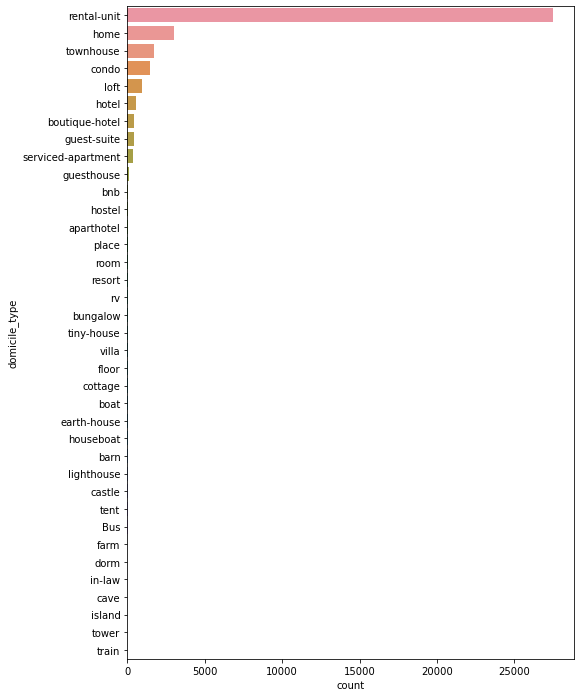

In [31]:
plt.figure(figsize = (8,12))
sns.countplot(y="domicile_type", data=listings, order = listings['domicile_type'].value_counts().index, orient='h')


### Key Observations:

Top Five domiciles types:
- Rental-Unit
- Home
- Townhouse
- Condo
- Loft

It appears many people are listing units that they might not own but, have certain rights to list on Airbnb. This makes sense for NYC many people rent apartments, instead of owning homes. To make money on the side they might stay with family or friends and list the unit.

### Approach:
We will observe how our Machine learning algorithm deals with that many types of domicile. We may reduce the levels with further groupings of categories with low sample sizes. 

### Drop property_type
removing this column from the data frame. 

In [32]:
listings.drop(['property_type'], axis=1, inplace = True)

# Data Preparation


Check remaining missing values and drop records

In [33]:
listings.isna().sum()

id                                   0
last_scraped                         0
name                                13
description                          0
neighborhood_overview                0
host_id                              0
host_name                            0
host_since                          23
host_location                      119
host_about                           0
host_response_time                   0
host_response_rate                   0
host_acceptance_rate                 0
host_neighbourhood                   0
host_listings_count                 23
host_verifications                   0
neighbourhood                        0
neighbourhood_cleansed               0
neighbourhood_group_cleansed         0
latitude                             0
longitude                            0
room_type                            0
accommodates                         0
bedrooms                             0
beds                               594
amenities                

Relatively small amount of missing values remaining after imputing in sections above. After dropping records with missing values we have 34460 records and 58 features with superhost as the target

In [34]:
listings = listings.dropna()
listings.shape


(34460, 59)

Examining Remaining columns, we will keep 'id' as an identifier and remove the following columns that are identifiers, repeate info contained in other columns, or not applicable to classification models due to too many unique values:

last_scraped
name
description
neighborhood_overview
host_id
host_name
host_since
host_location
host_about
host_verifications
neighbourhood
room_type
amenities
number_of_reviews_ltm
number_of_reviews_l30d
first_review
last_review
calculated_host_listings_count

In [35]:
listings.head()

,id,last_scraped,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_verifications,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable,num_baths,bath_type,reviews_duration,price_per_bed,price_per_accomodation,room_privacy,domicile_type
0,2595,2021-08-04,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,missing,86.330958,75.619603,Midtown,6,"['email', 'phone', 'reviews', 'offline_governm...","New York, United States",Midtown,Manhattan,40.75356,-73.98559,Entire home/apt,1,1,1,"[""Essentials"", ""Extra pillows and blankets"", ""...",150.0,30,1125,6,36,66,341,48,0,0,2009-11-21 00:00:00,2019-11-04 00:00:00,4.70,4.72,4.62,4.76,4.79,4.86,4.41,3,0.34,False,True,True,True,False,1.0,private,3635.0,150.0,150.0,entire,rental-unit
1,3831,2021-08-04,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,within a day,50.000000,88.000000,Clinton Hill,1,"['email', 'phone', 'reviews', 'offline_governm...","Brooklyn, New York, United States",Bedford-Stuyvesant,Brooklyn,40.68494,-73.95765,Entire home/apt,3,1,3,"[""Essentials"", ""TV with standard cable"", ""Baby...",75.0,1,730,0,1,7,212,408,68,0,2015-01-05 00:00:00,2021-06-29 00:00:00,4.46,4.59,4.50,4.79,4.81,4.72,4.65,1,5.09,False,True,True,True,False,1.0,private,2367.0,25.0,25.0,entire,guest-suite
3,5136,2021-08-04,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,missing,7378,Rebecca,2009-02-03,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",within a day,88.000000,33.000000,Greenwood Heights,1,"['email', 'phone', 'reviews']",missing,Sunset Park,Brooklyn,40.66265,-73.99454,Entire home/apt,4,2,2,"[""TV with standard cable"", ""Long term stays al...",275.0,5,1125,7,9,9,184,1,0,0,2014-01-02 00:00:00,2014-01-02 00:00:00,5.00,5.00,5.00,5.00,5.00,4.00,5.00,1,0.01,False,True,True,True,False,1.5,private,0.0,137.5,68.75,entire,rental-unit
4,5178,2021-08-04,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",8967,Shunichi,2009-03-03,"New York, New York, United States",I used to work for a financial industry but no...,within an hour,100.000000,100.000000,Hell's Kitchen,1,"['email', 'phone', 'facebook', 'reviews']","New York, United States",Midtown,Manhattan,40.76457,-73.98317,Private room,2,1,1,"[""Essentials"", ""Free street parking"", ""TV"", ""W...",61.0,2,14,3,7,14,255,485,12,4,2010-08-18 00:00:00,2021-07-18 00:00:00,4.20,4.19,3.71,4.65,4.40,4.86,4.35,1,3.63,False,True,False,True,False,1.0,private,3987.0,61.0,30.5,private-room,rental-unit
5,5203,2021-08-04,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,7490,MaryEllen,2009-02-05,"New York, New York, United States",Welcome to family life with my oldest two away...,missing,86.330958,75.619603,Upper West Side,

In [42]:
drop_variables = ['last_scraped', 'name', 'description', 'neighborhood_overview', 'host_id', 'host_name', 'host_since', 'host_location', 'host_about', 'host_verifications', 'neighbourhood', 
'room_type', 'amenities', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'calculated_host_listings_count', 
'host_neighbourhood', 'neighbourhood_cleansed', 'domicile_type']


listings_subset = listings.drop(drop_variables, axis=1)

print(listings_subset.shape)
print(listings_subset.columns)

# id=identifier, superhost=target, 39 remaining predictor features


(34460, 38)
Index(['id', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_listings_count',
       'neighbourhood_group_cleansed', 'latitude', 'longitude', 'accommodates',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'has_availability', 'instant_bookable', 'num_baths', 'bath_type',
       'reviews_duration', 'price_per_bed', 'price_per_accomodation',
       'room_privacy'],
      dtype='object')


## Joe I saw concerns you listed on dropping neighborhood and reducing domocile type having so many categories for one-hot encoding. I think you're right that we'll end up reducing but as a strting point I'm one-hot encoding them too and seeing if the model can handle so many one-hot columns to start

## One-hot encode categorical variables then drop originals

In [43]:
listings_subset.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable,num_baths,bath_type,reviews_duration,price_per_bed,price_per_accomodation,room_privacy
0,2595,missing,86.330958,75.619603,6,Manhattan,40.75356,-73.98559,1,1,1,150.0,30,1125,6,36,66,341,48,4.70,4.72,4.62,4.76,4.79,4.86,4.41,0.34,False,True,True,True,False,1.0,private,3635.0,150.0,150.0,entire
1,3831,within a day,50.000000,88.000000,1,Brooklyn,40.68494,-73.95765,3,1,3,75.0,1,730,0,1,7,212,408,4.46,4.59,4.50,4.79,4.81,4.72,4.65,5.09,False,True,True,True,False,1.0,private,2367.0,25.0,25.0,entire
3,5136,within a day,88.000000,33.000000,1,Brooklyn,40.66265,-73.99454,4,2,2,275.0,5,1125,7,9,9,184,1,5.00,5.00,5.00,5.00,5.00,4.00,5.00,0.01,False,True,True,True,False,1.5,private,0.0,137.5,68.75,entire
4,5178,within an hour,100.000000,100.000000,1,Manhattan,40.76457,-73.98317,2,1,1,61.0,2,14,3,7,14,255,485,4.20,4.19,3.71,4.65,4.40,4.86,4.35,3.63,False,True,False,True,False,1.0,private,3987.0,61.0,30.5,private-room
5,5203,missing,86.330958,75.619603,1,Manhattan,40.80380,-73.96751,1,1,1,75.0,2,14,0,0,0,0,118,4.91,4.83,4.82,4.97,4.95,4.94,4.92,0.90,False,True,True,True,False,1.0,shared,2468.0,75.0,75.0,private-room


In [45]:
Categoricals_to_convert = ['host_response_time', 'neighbourhood_group_cleansed', 'bath_type', 'room_privacy']

# using pd get dummies for the category columns we are keeping
dummies = pd.get_dummies(listings_subset[Categoricals_to_convert],drop_first=True)

#dropping original columns
modeling_df = listings_subset.drop(Categoricals_to_convert,axis=1)

#concating dummies to the data frame
modeling_df = pd.concat([modeling_df,dummies],axis=1)

#convert boolean variables to int so they can be included in VIF calculations
boolean_variables = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable']
modeling_df[boolean_variables] = modeling_df[boolean_variables].astype(int)

modeling_df.head()


,id,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable,num_baths,reviews_duration,price_per_bed,price_per_accomodation,host_response_time_missing,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,bath_type_shared,room_privacy_private-room,room_privacy_shared-room
0,2595,86.330958,75.619603,6,40.75356,-73.98559,1,1,1,150.0,30,1125,6,36,66,341,48,4.70,4.72,4.62,4.76,4.79,4.86,4.41,0.34,0,1,1,1,0,1.0,3635.0,150.0,150.0,1,0,0,0,0,1,0,0,0,0,0
1,3831,50.000000,88.000000,1,40.68494,-73.95765,3,1,3,75.0,1,730,0,1,7,212,408,4.46,4.59,4.50,4.79,4.81,4.72,4.65,5.09,0,1,1,1,0,1.0,2367.0,25.0,25.0,0,1,0,0,1,0,0,0,0,0,0
3,5136,88.000000,33.000000,1,40.66265,-73.99454,4,2,2,275.0,5,1125,7,9,9,184,1,5.00,5.00,5.00,5.00,5.00,4.00,5.00,0.01,0,1,1,1,0,1.5,0.0,137.5,68.75,0,1,0,0,1,0,0,0,0,0,0
4,5178,100.000000,100.000000,1,40.76457,-73.98317,2,1,1,61.0,2,14,3,7,14,255,485,4.20,4.19,3.71,4.65,4.40,4.86,4.35,3.63,0,1,0,1,0,1.0,3987.0,61.0,30.5,0,0,0,1,0,1,0,0,0,1,0
5,5203,86.330958,75.619603,1,40.80380,-73.96751,1,1,1,75.0,2,14,0,0,0,0,118,4.91,4.83,4.82,4.97,4.95,4.94,4.92,0.90,0,1,1,1,0,1.0,2468.0,75.0,75.0,1,0,0,0,0,1,0,0,1,1,0


In [46]:
modeling_df.dtypes

id                                              int64
host_response_rate                            float64
host_acceptance_rate                          float64
host_listings_count                             Int16
latitude                                      float64
longitude                                     float64
accommodates                                    Int16
bedrooms                                        Int16
beds                                            Int16
price                                         float64
minimum_nights                                  Int16
maximum_nights                                  int64
availability_30                                 Int16
availability_60                                 Int16
availability_90                                 Int16
availability_365                                Int16
number_of_reviews                               Int16
review_scores_rating                          float64
review_scores_accuracy      

Check VIF for multicollinearity issue

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#vif = modeling_df.assign(const=1)
#vif = vif.astype(float)
#X.dtypes

#pd.Series([variance_inflation_factor(vif.values, i) for i in range(vif.shape[1])], index=vif.columns)

## Logistic Regression starting point

In [48]:
X = modeling_df.drop(['host_is_superhost','id'],axis=1).values
y = modeling_df['host_is_superhost'].values

In [49]:
from sklearn.preprocessing import StandardScaler
scl_obj = StandardScaler()
scl_obj.fit(X)
X = scl_obj.transform(X)

# Should we move the scaling to be after the test/train split

Create Test/Train Splits

In [70]:
from sklearn.model_selection import ShuffleSplit

#Need to add line to set seed for reproducibility

num_cv_iterations = 3 #Change to 10 fold for final optimization (longer compute time)
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations, test_size  = 0.2, random_state=27)

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

In [80]:
lr = LogisticRegression(penalty='l2', C=1.0, class_weight=None, solver='liblinear' ) # get object

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(lr, X, y=y, cv=cv_object) # this also can help with parallelism
print(accuracies)
print("Mean Accuracy = ",np.mean(accuracies))


[0.83720255 0.84126524 0.83995937]
Mean Accuracy =  0.8394757206422906


In [73]:
lr.fit(X,y)

weights = lr.coef_.T # take transpose to make a column vector
variable_names = modeling_df.drop(['host_is_superhost','id'],axis=1).columns #Fixed to relect names that are in X but need to update manually if changed above
#for coef, name in zip(weights,variable_names):
#    print(name, 'has weight of', coef[0])

coefficients = pd.DataFrame(weights,variable_names)
coefficients = coefficients.rename(columns={coefficients.columns[0]: 'weight'})
coefficients = coefficients.sort_values(by='weight', key=abs, ascending=False)
coefficients.head(100)

,weight
review_scores_rating,1.336188
host_listings_count,-0.865265
host_response_rate,0.851087
host_response_time_missing,-0.620050
availability_60,-0.449985
review_scores_communication,0.385970
review_scores_cleanliness,0.334469
reviews_duration,0.330928
availability_90,0.251748
host_response_time_within a day,-0.222068


Re-run logistic regression with just the top 8 variable weights to compare performance of reduced model

review_scores_rating	1.336188
host_listings_count	-0.865265
host_response_rate	0.851087
host_response_time_missing	-0.620050
availability_60	-0.449985
review_scores_communication	0.385970
review_scores_cleanliness	0.334469
reviews_duration	0.330928

In [79]:
predictors = ['review_scores_rating','host_listings_count','host_response_rate','host_response_time_missing','availability_60','review_scores_communication','review_scores_cleanliness','reviews_duration']

#Create new X predictor matrix
X2 = modeling_df[predictors].values

#Scale new predictor matrix
scl_obj.fit(X2)
X2 = scl_obj.transform(X2)

accuracies2 = cross_val_score(lr, X2, y=y, cv=cv_object) # this also can help with parallelism
print(accuracies2)
print("Mean Accuracy = ",np.mean(accuracies2))

#Note mean accuracy went down slightly when variables reduced to 8




[0.83372026 0.83879861 0.83995937]
Mean Accuracy =  0.8374927452118398


In [81]:
#Try just top 4
predictors = ['review_scores_rating','host_listings_count','host_response_rate','host_response_time_missing']

#Create new X predictor matrix
X3 = modeling_df[predictors].values

#Scale new predictor matrix
scl_obj.fit(X3)
X3 = scl_obj.transform(X3)

accuracies3 = cross_val_score(lr, X3, y=y, cv=cv_object) # this also can help with parallelism
print(accuracies3)
print("Mean Accuracy = ",np.mean(accuracies3))

#Note mean accuracy went down more when variables reduced to 4

[0.81616367 0.81775972 0.81732443]
Mean Accuracy =  0.8170826078545174


In [102]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

pipe = Pipeline([('classifier' , LogisticRegression())])

# Create param grid.
param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 1, 20),
    'classifier__solver' : ['liblinear'],
    'classifier__class_weight' : [None,"balanced"]}
]

# Create grid search object
clf = GridSearchCV(pipe, param_grid = param_grid, cv = cv_object, verbose=True, n_jobs=-1)

# Fit on data
best_clf = clf.fit(X, y)


Fitting 3 folds for each of 80 candidates, totalling 240 fits


In [103]:
print(best_clf.best_estimator_.get_params()['classifier'])

print('Model accuracy is',best_clf.score(X, y))


LogisticRegression(C=0.04281332398719392, penalty='l1', solver='liblinear')
Model accuracy is 0.8464596633778294


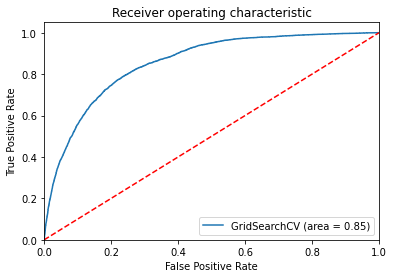

In [138]:
probs = best_clf.predict_proba(X)
preds = probs[:,1]
fpr, tpr, threshold = mt.roc_curve(y, preds)
roc_auc = mt.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [139]:
probs = pd.DataFrame(probs)
probs = probs.rename(columns={probs.columns[0]: 'probability_not_superhost'})
probs = probs.rename(columns={probs.columns[1]: 'probability_superhost'})
#probs.head(100)
predictions = modeling_df.join(probs)
predictions.head()

,id,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable,num_baths,reviews_duration,price_per_bed,price_per_accomodation,host_response_time_missing,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,bath_type_shared,room_privacy_private-room,room_privacy_shared-room,probability_not_superhost,probability_superhost
0,2595,86.330958,75.619603,6,40.75356,-73.98559,1,1,1,150.0,30,1125,6,36,66,341,48,4.70,4.72,4.62,4.76,4.79,4.86,4.41,0.34,0,1,1,1,0,1.0,3635.0,150.0,150.0,1,0,0,0,0,1,0,0,0,0,0,0.777565,0.222435
1,3831,50.000000,88.000000,1,40.68494,-73.95765,3,1,3,75.0,1,730,0,1,7,212,408,4.46,4.59,4.50,4.79,4.81,4.72,4.65,5.09,0,1,1,1,0,1.0,2367.0,25.0,25.0,0,1,0,0,1,0,0,0,0,0,0,0.749733,0.250267
3,5136,88.000000,33.000000,1,40.66265,-73.99454,4,2,2,275.0,5,1125,7,9,9,184,1,5.00,5.00,5.00,5.00,5.00,4.00,5.00,0.01,0,1,1,1,0,1.5,0.0,137.5,68.75,0,1,0,0,1,0,0,0,0,0,0,0.322139,0.677861
4,5178,100.000000,100.000000,1,40.76457,-73.98317,2,1,1,61.0,2,14,3,7,14,255,485,4.20,4.19,3.71,4.65,4.40,4.86,4.35,3.63,0,1,0,1,0,1.0,3987.0,61.0,30.5,0,0,0,1,0,1,0,0,0,1,0,0.591811,0.408189
5,5203,86.330958,75.619603,1,40.80380,-73.96751,1,1,1,75.0,2,14,0,0,0,0,118,4.91,4.83,4.82,4.97,4.95,4.94,4.92,0.90,0,1,1,1,0,1.0,2468.0,75.0,75.0,1,0,0,0,0,1,0,0,1,1,0,0.258176,0.741824


<AxesSubplot:xlabel='host_is_superhost', ylabel='probability_superhost'>

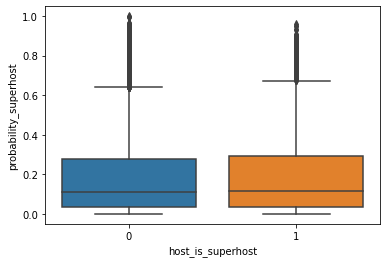

In [140]:
plt.figure()
sns.boxplot(x='host_is_superhost', y='probability_superhost', data=predictions)
#plt.ylim(0, 400)

In [110]:
parameters = {
                'penalty': ['l1', 'l2', 'elasticnet', 'none'], 
                'C': [1, 10, 20],
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                'class_weight': [None, 'balanced'],
             }


clf = LogisticRegression()

grid_obj = GridSearchCV(clf, parameters, cv=cv_object, scoring='accuracy')
grid_obj = grid_obj.fit(X, y)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selectio

In [111]:
print(grid_obj.best_estimator_.get_params())

print('Model accuracy is',grid_obj.score(X, y))

{'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'sag', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Model accuracy is 0.8466047591410331


In [112]:
parameters = {
                'penalty': ['l1', 'l2', 'elasticnet', 'none'], 
                'C': [1, 10, 20],
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                'class_weight': [None, 'balanced'],
             }


clf = LogisticRegression()

grid_obj = GridSearchCV(clf, parameters, cv=cv_object, scoring='accuracy')
grid_obj = grid_obj.fit(X2, y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selectio

In [114]:
print(grid_obj.best_estimator_.get_params())

print('Model accuracy is',grid_obj.score(X2, y))

{'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'none', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Model accuracy is 0.8421067904817179


Start over with just variables from EDA intuition in Lab 1:
host_response_time
number_of_reviews
review_scores_rating

In [142]:
intuition = listings_subset[['host_is_superhost','host_response_time', 'number_of_reviews', 'review_scores_rating']]

# using pd get dummies for the category columns we are keeping
dummies2 = pd.get_dummies(intuition['host_response_time'],drop_first=True)

#dropping original columns
intuition = intuition.drop('host_response_time',axis=1)

#concating dummies to the data frame
intuition = pd.concat([intuition,dummies2],axis=1)

intuition.head()

,host_is_superhost,number_of_reviews,review_scores_rating,missing,within a day,within a few hours,within an hour
0,False,48,4.70,1,0,0,0
1,False,408,4.46,0,1,0,0
3,False,1,5.00,0,1,0,0
4,False,485,4.20,0,0,0,1
5,False,118,4.91,1,0,0,0


In [151]:
predictors = ['review_scores_rating','host_listings_count','host_response_rate','host_response_time_missing','availability_60','review_scores_communication','review_scores_cleanliness','reviews_duration']

#Create new X predictor matrix
X_intuition = intuition.drop(['host_is_superhost'],axis=1).values
y_intuition = intuition['host_is_superhost'].astype(int).values

#Scale new predictor matrix
scl_obj.fit(X_intuition)
X_intuition = scl_obj.transform(X_intuition)

#print(y_intuition)

accuracies4 = cross_val_score(lr, X_intuition, y=y_intuition, cv=cv_object) # this also can help with parallelism
print(accuracies4)
print("Mean Accuracy = ",np.mean(accuracies4))

#Note mean accuracy went down slightly when variables reduced to 8

[0.83517121 0.83531631 0.83937899]
Mean Accuracy =  0.8366221706326176


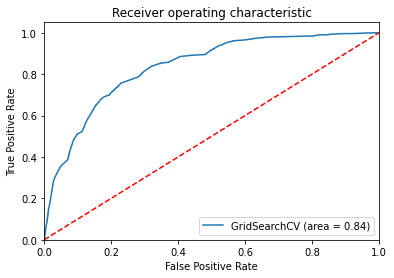

In [153]:
# Fit on data
intuition_lr = lr.fit(X_intuition, y_intuition)

probs = intuition_lr.predict_proba(X_intuition)
preds = probs[:,1]
fpr, tpr, threshold = mt.roc_curve(y_intuition, preds)
roc_auc = mt.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [154]:
probs = pd.DataFrame(probs)
probs = probs.rename(columns={probs.columns[0]: 'probability_not_superhost'})
probs = probs.rename(columns={probs.columns[1]: 'probability_superhost'})
#probs.head(100)
predictions = intuition.join(probs)
predictions.head()

,host_is_superhost,number_of_reviews,review_scores_rating,missing,within a day,within a few hours,within an hour,probability_not_superhost,probability_superhost
0,False,48,4.70,1,0,0,0,0.919535,0.080465
1,False,408,4.46,0,1,0,0,0.229241,0.770759
3,False,1,5.00,0,1,0,0,0.101410,0.898590
4,False,485,4.20,0,0,0,1,0.732599,0.267401
5,False,118,4.91,1,0,0,0,0.518805,0.481195


<AxesSubplot:xlabel='host_is_superhost', ylabel='probability_superhost'>

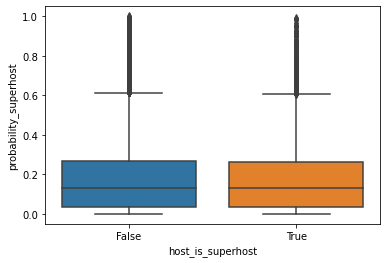

In [155]:
plt.figure()
sns.boxplot(x='host_is_superhost', y='probability_superhost', data=predictions)
#plt.ylim(0, 400)

In [162]:
most_listings = listings[listings.host_listings_count == np.max(listings.host_listings_count)]
most_listings.head(100)

,id,last_scraped,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_verifications,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable,num_baths,bath_type,reviews_duration,price_per_bed,price_per_accomodation,room_privacy,domicile_type
24502,39112224,2021-08-04,"Exquisite Club Wyndham Midtown 45, 1 Bedroom S...","Exquisite Club Wyndham Midtown 45, 1 Bedroom S...",Resort Description:<br /><br />In the heart of...,194953121,Christian,2018-06-11,United States,My team and I have access to 917+ resorts thro...,within an hour,100.0,99.0,Table Rock,3966,"['email', 'phone', 'jumio', 'offline_governmen...","Manhattan, New York, United States",Midtown,Manhattan,40.75309,-73.97134,Entire home/apt,4,1,2,"[""Essentials"", ""TV with standard cable"", ""Cabl...",771.0,2,182,0,0,0,0,1,0,0,2019-12-10 00:00:00,2019-12-10 00:00:00,1.000000,1.000000,4.000000,3.000000,1.00000,5.000000,1.000000,7,0.05,False,True,True,True,True,1.0,private,0.0,385.5,192.75,entire,condo
24724,39398030,2021-08-04,"Nocturnal Club Wyndham Midtown 45, 1 Bedroom S...","Nocturnal Club Wyndham Midtown 45, 1 Bedroom S...",Resort Description:<br /><br />In the heart of...,194953121,Christian,2018-06-11,United States,My team and I have access to 917+ resorts thro...,within an hour,100.0,99.0,Table Rock,3966,"['email', 'phone', 'jumio', 'offline_governmen...","Manhattan, New York, United States",Midtown,Manhattan,40.75371,-73.97301,Entire home/apt,4,1,2,"[""Essentials"", ""TV with standard cable"", ""Cabl...",771.0,3,182,0,0,0,0,0,0,0,2021-09-25,2021-09-25,4.574993,4.751773,4.612116,4.820892,4.81711,4.754904,4.655163,7,0.00,False,True,True,True,True,1.0,private,0.0,385.5,192.75,entire,condo
25952,40804600,2021-08-04,"Club Wyndham Midtown 45, New York City, 1 Bedroom","Club Wyndham Midtown 45, New York City, 1 Bedr...",Resort Description:<br /><br />In the heart of...,194953121,Christian,2018-06-11,United States,My team and I have access to 917+ resorts thro...,within an hour,100.0,99.0,Table Rock,3966,"['email', 'phone', 'jumio', 'offline_governmen...","Manhattan, New York, United States",Midtown,Manhattan,40.75326,-73.97169,Private room,2,1,1,"[""Essentials"", ""TV with standard cable"", ""Cabl...",643.0,4,182,0,30,60,309,0,0,0,2021-09-25,2021-09-25,4.574993,4.751773,4.612116,4.820892,4.81711,4.754904,4.655163,7,0.00,False,True,True,True,True,1.0,private,0.0,643.0,321.5,private-room,home
26049,40913517,2021-08-04,"Club Wyndham Midtown 45, New York City, 1 Bedroom","Club Wyndham Midtown 45, New York City, 1 Bedr...",Resort Description:<br /><br />In the heart of...,194953121,Christian,2018-06-11,United States,My team and I have access to 917+ resorts thro...,within an hour,100.0,99.0,Table Rock,3966,"['email', 'phone', 'jumio', 'offline_governmen...","Manhattan, New York, United States",Midtown,Manhattan,40.75171,-73.97136,Private room,2,1,1,"[""Essentials"", ""TV with standard cable"", ""Cabl...",643.0,4,182,0,30,60,309,0,0,0,2021-09-25,2021-09-25,4.574993,4.751773,4.612116,4.820892,4.81711,4.754904,4.655163,7,0.00,False,True,True,True,True,1.0,private,0.0,643.0,321.5,private-room,home
26208,41106442,2021-08-04,"Club Wyndham Midtown 45, New York City, 1 Bedroom","Club Wyndham Midtown 45, New York City, 1 Bedr...",Resort Description:<br /><br />In the heart of...,1949531

Some take-aways examining problem:

* host_listings_count appears to include host listings outside of this NYC data set for instance host id 194953121 shows host_listings = 3966 but only has 7 listings in this data set. Calculated host listings = 7 and matches this set so may be more appropriate
* Of the 7 listings in this data set all of them have review_scores_rating less than 4.6 which we know does not meet criteria
* Of the 7 listings in this data set only one has a review the other 6 are 0 meaning it likely violates another superhost rule of needing minimum 5 stays
* Wait, all 7 are listed as not superhost so maybe this is not a problem

In [164]:
most_calculated_listings = listings[listings.calculated_host_listings_count == np.max(listings.calculated_host_listings_count)]
most_calculated_listings.head(10)

,id,last_scraped,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_verifications,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable,num_baths,bath_type,reviews_duration,price_per_bed,price_per_accomodation,room_privacy,domicile_type
27885,43298710,2021-08-04,Furnished 1 BR with Amenities in Upper West Side,1 bedroom apartment in Upper West Side.<br />...,Welcome to the Upper West Side – one of the be...,305240193,June,2019-10-29,"New York, New York, United States","At June Homes, our mission is to make renting ...",within a day,97.0,29.0,Crown Heights,219,"['email', 'phone', 'jumio', 'offline_governmen...","New York, United States",Upper West Side,Manhattan,40.78550,-73.97471,Entire home/apt,1,1,1,"[""Essentials"", ""Dishwasher"", ""Heating"", ""Micro...",153.0,30,180,27,36,66,341,0,0,0,2021-09-25,2021-09-25,4.574993,4.751773,4.612116,4.820892,4.81711,4.754904,4.655163,335,0.0,False,True,True,True,False,1.0,private,0.0,153.0,153.0,entire,rental-unit
27894,43309759,2021-08-04,Fully-Furnished Upper West Side Nook w/ Amenities,1 bedroom apartment in Upper West Side.<br />...,Welcome to the Upper West Side – one of the be...,305240193,June,2019-10-29,"New York, New York, United States","At June Homes, our mission is to make renting ...",within a day,97.0,29.0,Crown Heights,219,"['email', 'phone', 'jumio', 'offline_governmen...","New York, United States",Upper West Side,Manhattan,40.78489,-73.97520,Entire home/apt,1,1,1,"[""Essentials"", ""Dishwasher"", ""Heating"", ""Micro...",146.0,30,180,29,59,89,364,0,0,0,2021-09-25,2021-09-25,4.574993,4.751773,4.612116,4.820892,4.81711,4.754904,4.655163,335,0.0,False,True,True,True,False,1.0,private,0.0,146.0,146.0,entire,rental-unit
27895,43309826,2021-08-04,Fully Furnished Sunny 1 Bedroom in Upper West ...,1 bedroom apartment in Upper West Side.<br />...,Welcome to the Upper West Side – one of the be...,305240193,June,2019-10-29,"New York, New York, United States","At June Homes, our mission is to make renting ...",within a day,97.0,29.0,Crown Heights,219,"['email', 'phone', 'jumio', 'offline_governmen...","New York, United States",Upper West Side,Manhattan,40.78345,-73.97516,Entire home/apt,1,1,1,"[""Essentials"", ""Dishwasher"", ""Heating"", ""Micro...",141.0,30,180,19,49,79,354,0,0,0,2021-09-25,2021-09-25,4.574993,4.751773,4.612116,4.820892,4.81711,4.754904,4.655163,335,0.0,False,True,True,True,False,1.0,private,0.0,141.0,141.0,entire,rental-unit
27906,43314395,2021-08-04,Brick Studio w/ Outdoor Space in Upper East Side,Studio apartment in Upper East Side.<br />M...,Welcome to The Upper East Side – located north...,305240193,June,2019-10-29,"New York, New York, United States","At June Homes, our mission is to make renting ...",within a day,97.0,29.0,Crown Heights,219,"['email', 'phone', 'jumio', 'offline_governmen...","New York, United States",Upper East Side,Manhattan,40.77541,-73.95338,Entire home/apt,1,1,1,"[""Essentials"", ""Pocket wifi"", ""Heating"", ""Toas...",124.0,30,180,29,59,89,364,0,0,0,2021-09-25,2021-09-25,4.574993,4.751773,4.612116,4.820892,4.81711,4.754904,4.655163,335,0.0,False,True,True,True,False,1.0,private,0.0,124.0,124.0,entire,rental-unit
28103,43473694,2021-08-04,Urban Living in Upper West Size Sunlit Home,1 bedroom apartment in Upper West Side.<br />...,

In [173]:
#status_by_host = pd.DataFrame(pd.crosstab(listings.host_id, listings.host_is_superhost, normalize='index'))
status_by_host = listings.groupby(['host_id', 'host_is_superhost']).size().unstack(fill_value=0)

status_by_host.head(100)

host_is_superhost,False,True
host_id,,
2420,0,1
2438,1,0
2571,0,1
2782,1,0
2787,6,0
2845,2,0
2868,1,0
2881,0,2
3757,1,0


In [177]:
host2787 = listings[listings['host_id'] == 2787]
host2787.head(10)

,id,last_scraped,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_verifications,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable,num_baths,bath_type,reviews_duration,price_per_bed,price_per_accomodation,room_privacy,domicile_type
6144,7937553,2021-08-05,Corona free. Riomaggiore Queen Bedroom in Bklyn,The Riomaggione Room features and amenities:<...,"The neighborhood is a quiet, tree lined reside...",2787,John,2008-09-07,"Yonkers, New York, United States",Educated professional living in Brooklyn. I l...,within an hour,100.0,94.0,Gravesend,8,"['email', 'phone', 'reviews', 'kba']","Brooklyn, New York, United States",Bensonhurst,Brooklyn,40.60966,-73.97645,Private room,2,1,2,"[""Essentials"", ""Backyard"", ""Free parking on pr...",149.0,1,365,30,60,90,179,30,4,0,2021-06-01 00:00:00,2021-04-16 00:00:00,4.830000,4.830000,4.830000,4.970000,4.97000,4.770000,4.800000,8,13.64,False,True,True,True,False,1.0,shared,-46.0,74.50,74.5,private-room,townhouse
8076,10160215,2021-08-05,Corona free. Torre del Lago Room.,The Torre de Lago Room features and amenities...,"We live on a quiet, treelined street. Restaur...",2787,John,2008-09-07,"Yonkers, New York, United States",Educated professional living in Brooklyn. I l...,within an hour,100.0,94.0,Gravesend,8,"['email', 'phone', 'reviews', 'kba']","Gravesend Brooklyn , New York, United States",Gravesend,Brooklyn,40.60813,-73.97380,Private room,2,1,2,"[""Essentials"", ""Free parking on premises"", ""Ex...",149.0,1,365,30,60,90,179,25,2,0,2016-10-10 00:00:00,2021-07-03 00:00:00,4.800000,4.770000,4.910000,4.760000,5.00000,4.650000,4.750000,8,0.43,False,True,True,True,False,1.0,shared,1727.0,74.50,74.5,private-room,townhouse
8146,10267242,2021-08-05,Corona free. Clean and Quiet Queen Bedroom,The Cinque Terre Room features and amenities:<...,"Quiet tree lined residential area, near conven...",2787,John,2008-09-07,"Yonkers, New York, United States",Educated professional living in Brooklyn. I l...,within an hour,100.0,94.0,Gravesend,8,"['email', 'phone', 'reviews', 'kba']","Brooklyn, New York, United States",Gravesend,Brooklyn,40.60783,-73.97587,Private room,2,1,2,"[""Essentials"", ""Free parking on premises"", ""Co...",149.0,1,1125,23,53,83,172,35,7,0,2021-01-06 00:00:00,2021-03-10 00:00:00,4.740000,4.710000,4.860000,4.830000,4.89000,4.630000,4.630000,8,4.95,False,True,True,True,False,1.0,shared,63.0,74.50,74.5,private-room,townhouse
8326,10593675,2021-08-05,"La Spezia rm. Clean, quiet and available tonight",*Clean and comfortable full sized futon bed. ...,Quiet residential neighborhood,2787,John,2008-09-07,"Yonkers, New York, United States",Educated professional living in Brooklyn. I l...,within an hour,100.0,94.0,Gravesend,8,"['email', 'phone', 'reviews', 'kba']","Brooklyn , New York, United States",Bensonhurst,Brooklyn,40.60972,-73.97637,Shared room,2,1,1,"[""Essentials"", ""Free parking on premises"", ""Ex...",99.0,1,1125,24,54,84,173,21,1,0,2018-07-12 00:00:00,2021-04-09 00:00:00,4.570000,4.570000,4.520000,4.570000,4.81000,4.620000,4.520000,8,0.56,False,True,True,True,False,1.0,shared,1002.0,99.00,49.5,shared-room,townhouse
12194,17263207,2021-08-05,Corona free and clean. Liguria room.,*Clean and comfortable room with twin bed for ...,"Quiet, tree lined residential area with amenit..."

In [178]:

host23193 = listings[listings['host_id'] == 23193]
host23193.head(10)

,id,last_scraped,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_verifications,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable,num_baths,bath_type,reviews_duration,price_per_bed,price_per_accomodation,room_privacy,domicile_type
2686,3158256,2021-08-04,"4 bedrooms, 3 bath Unit/share",Large bedroom on the 2nd Floor of duplex. Bedr...,Close to great restaurants like Saraghina and ...,23193,Paris,2009-06-25,"Montgomery County, Maryland, United States",missing,a few days or more,0.0,0.0,Bedford-Stuyvesant,6,"['email', 'phone', 'reviews', 'kba', 'work_ema...","Brooklyn, New York, United States",Bedford-Stuyvesant,Brooklyn,40.68599,-73.93749,Private room,1,1,4,"[""Essentials"", ""TV with standard cable"", ""Long...",45.0,30,75,0,0,0,0,2,0,0,2015-10-22 00:00:00,2015-11-14 00:00:00,4.000000,5.000000,3.000000,5.000000,5.00000,3.000000,4.000000,6,0.03,False,True,True,False,False,2.5,private,23.0,11.25,45.0,private-room,townhouse
3085,3779230,2021-08-04,Upper Den,This sunny den has a twin bed which creates mo...,Our entrance is the red door at the top of the...,23193,Paris,2009-06-25,"Montgomery County, Maryland, United States",missing,a few days or more,0.0,0.0,Bedford-Stuyvesant,6,"['email', 'phone', 'reviews', 'kba', 'work_ema...","Brooklyn, New York, United States",Bedford-Stuyvesant,Brooklyn,40.68806,-73.93736,Private room,1,1,1,"[""Essentials"", ""TV with standard cable"", ""Back...",34.0,30,75,2,32,62,337,9,0,0,2015-06-12 00:00:00,2019-07-11 00:00:00,5.000000,4.880000,4.750000,4.630000,4.63000,4.500000,4.880000,6,0.12,False,True,True,True,False,2.5,shared,1490.0,34.00,34.0,private-room,rental-unit
7382,9603803,2021-08-04,Brooklyn Charm,This den is on the main floor with the access ...,Beautiful tree lined streets cafes and best It...,23193,Paris,2009-06-25,"Montgomery County, Maryland, United States",missing,a few days or more,0.0,0.0,Bedford-Stuyvesant,6,"['email', 'phone', 'reviews', 'kba', 'work_ema...","Brooklyn, New York, United States",Bedford-Stuyvesant,Brooklyn,40.68668,-73.93896,Private room,1,1,2,"[""Essentials"", ""TV with standard cable"", ""Long...",36.0,30,75,2,32,62,62,11,0,0,2019-04-08 00:00:00,2019-06-30 00:00:00,4.400000,4.300000,4.700000,4.400000,4.40000,4.400000,4.600000,6,0.39,False,True,True,True,False,2.5,private,83.0,18.00,36.0,private-room,rental-unit
7384,9604498,2021-08-04,Brooklyn Brownstone Charm,15 feet High Ceilings with two south facing w...,Beautiful treelined blocks with cares and the ...,23193,Paris,2009-06-25,"Montgomery County, Maryland, United States",missing,a few days or more,0.0,0.0,Bedford-Stuyvesant,6,"['email', 'phone', 'reviews', 'kba', 'work_ema...","Brooklyn, New York, United States",Bedford-Stuyvesant,Brooklyn,40.68755,-73.93713,Private room,2,2,1,"[""TV with standard cable"", ""Long term stays al...",40.0,30,75,0,0,0,0,0,0,0,2021-09-25,2021-09-25,4.574993,4.751773,4.612116,4.820892,4.81711,4.754904,4.655163,6,0.00,False,True,True,False,False,0.0,shared,0.0,40.00,20.0,private-room,townhouse
7824,9944808,2021-08-04,Spacious Den,Minimum 3 day stay. Academic semesters are pe...,Our entrance is the red door at the top of the...,23193,Paris,2009-06-25,"Montgomery County, Maryland, United States",missing,a few days or more,0.0,0.0,Bedford-Stuyvesant,6,"['email', 'phone', 'rev

host23193 has 6 listings, none of them show superhost status even though one listing has 9 reviews and a perfect rating of 5.0

Why is this? Do you have to meet superhost on all of your listings?

Remember from Lab1 EDA there were some superhost with rating less than 4.8, take a look at those for more clues

In [181]:

low_rating_superhosts = listings[(listings['host_is_superhost'] == True) & (listings['review_scores_rating'] < 4.79)]
low_rating_superhosts.head(10)



,id,last_scraped,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_verifications,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable,num_baths,bath_type,reviews_duration,price_per_bed,price_per_accomodation,room_privacy,domicile_type
14,8490,2021-08-04,"Maison des Sirenes1,bohemian, luminous apartment",<b>The space</b><br />I am the lucky owner of ...,missing,25183,Nathalie,2009-07-10,"New York, New York, United States",I am French and have been living in Ny for 10...,within an hour,100.0,98.0,Bedford-Stuyvesant,2,"['email', 'phone', 'reviews', 'jumio', 'govern...",missing,Bedford-Stuyvesant,Brooklyn,40.68462,-73.93839,Entire home/apt,5,1,4,"[""Essentials"", ""TV with standard cable"", ""Cabl...",136.0,2,1125,15,15,45,315,132,18,0,2012-03-05 00:00:00,2021-06-28 00:00:00,4.76,4.85,4.73,4.88,4.87,4.59,4.74,2,1.15,True,True,True,True,False,1.0,private,3402.0,34.000000,27.2,entire,loft
16,9657,2021-08-04,Modern 1 BR / NYC / East Village,"Awesome, spacious & clean 1 bedroom with a coz...",The east village offers a mixture of old schoo...,21904,Dana,2009-06-16,"New York, New York, United States",I am an industrial designer and native new yor...,within a few hours,90.0,71.0,East Village,1,"['email', 'phone', 'reviews', 'kba']","New York, United States",East Village,Manhattan,40.72712,-73.98598,Entire home/apt,2,1,1,"[""Essentials"", ""TV with standard cable"", ""Cabl...",192.0,10,30,16,31,34,34,39,6,1,2017-03-21 00:00:00,2021-07-17 00:00:00,4.69,4.85,4.44,4.88,4.85,4.85,4.29,1,0.73,True,True,True,True,True,1.0,private,1579.0,192.000000,96.0,entire,rental-unit
18,10452,2021-08-04,Large B&B Style rooms,Great location.<br /><br /><b>The space</b><br...,missing,35935,Angela,2009-09-03,"New York, New York, United States",Loves to travel and host.,within a few hours,100.0,86.0,Bedford-Stuyvesant,0,"['email', 'phone', 'reviews', 'offline_governm...",missing,Bedford-Stuyvesant,Brooklyn,40.68294,-73.95682,Private room,3,1,2,"[""Essentials"", ""TV with standard cable"", ""Cabl...",80.0,30,730,0,3,19,212,76,1,0,2012-04-17 00:00:00,2021-04-01 00:00:00,4.67,4.48,4.61,4.71,4.84,4.37,4.63,5,0.67,True,True,True,True,False,1.0,shared,3271.0,40.000000,26.666667,private-room,rental-unit
26,13394,2021-08-04,Fort Greene brownstone,Huge room on parlor floor of 100-year old buil...,missing,52335,Alexander,2009-11-08,"Brooklyn, New York, United States","my father is a painter, engineer, translator\n...",within a few hours,100.0,0.0,Fort Greene,2,"['email', 'phone', 'reviews', 'kba']",missing,Fort Greene,Brooklyn,40.69222,-73.97336,Private room,2,1,1,"[""Essentials"", ""Free street parking"", ""Long te...",80.0,1,1125,0,2,4,129,143,0,0,2011-10-30 00:00:00,2019-08-24 00:00:00,4.72,4.80,4.67,4.80,4.87,4.83,4.66,1,1.20,True,True,True,True,False,1.0,shared,2855.0,80.000000,40.0,private-room,rental-unit
30,15220,2021-08-04,Best Location in NYC! TIMES SQUARE!,Super cool and spacious bedroom.!Super quiet t...,missing,59734,Luiz,2009-12-03,"New York, New York, United States","Easy going, down to earth, busy, and fun! I j...",within an hour,100.0,98.0,Hell's Kitchen,2,"['email', 'phone', 'reviews', 'kba']",missing,Hell's Kitchen,Manhattan,40.75611,-73.99523,Private room,1,1,1,"[""Essentials"", ""Extra pillows and blankets"", ""...",79.0,2,29,5,20,41,309,328,

Host 3223938
has 109 listings in this data set
All are listed as superhost
Most have rating less than 4.8 and no reviews



In [190]:
most_lowrated = low_rating_superhosts[low_rating_superhosts.calculated_host_listings_count == np.max(low_rating_superhosts.calculated_host_listings_count)]
most_lowrated.head(110)

,id,last_scraped,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_verifications,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable,num_baths,bath_type,reviews_duration,price_per_bed,price_per_accomodation,room_privacy,domicile_type
29388,45370387,2021-08-04,"Large room, exposed brick, 23 min to Manhattan",This apartment was completely renovated only a...,missing,3223938,Eugene,2012-08-11,"Brooklyn, New York, United States","my number: (Phone number hidden by Airbnb) , m...",within a few hours,95.0,19.0,Flatbush,88,"['email', 'phone', 'facebook', 'google', 'revi...",missing,Ridgewood,Queens,40.701070,-73.905380,Private room,1,1,1,"[""Backyard"", ""Long term stays allowed"", ""TV"", ...",34.0,30,365,0,0,0,246,0,0,0,2021-09-25,2021-09-25,4.574993,4.751773,4.612116,4.820892,4.81711,4.754904,4.655163,109,0.00,True,True,True,True,False,2.0,shared,0.0,34.0,34.0,private-room,rental-unit
30182,46035568,2021-08-04,Penthouse + private terrace by Prospect Park -...,Get a true New York experience with floor to c...,missing,3223938,Eugene,2012-08-11,"Brooklyn, New York, United States","my number: (Phone number hidden by Airbnb) , m...",within a few hours,95.0,19.0,Flatbush,88,"['email', 'phone', 'facebook', 'google', 'revi...",missing,Prospect-Lefferts Gardens,Brooklyn,40.659180,-73.953820,Private room,1,1,1,"[""Free street parking"", ""Long term stays allow...",38.0,30,365,0,2,32,307,0,0,0,2021-09-25,2021-09-25,4.574993,4.751773,4.612116,4.820892,4.81711,4.754904,4.655163,109,0.00,True,True,True,True,False,2.0,shared,0.0,38.0,38.0,private-room,rental-unit
30208,46065989,2021-08-04,Penthouse + private terrace by Prospect Park #148,Get a true New York experience with floor to c...,missing,3223938,Eugene,2012-08-11,"Brooklyn, New York, United States","my number: (Phone number hidden by Airbnb) , m...",within a few hours,95.0,19.0,Flatbush,88,"['email', 'phone', 'facebook', 'google', 'revi...",missing,Prospect-Lefferts Gardens,Brooklyn,40.659320,-73.951720,Private room,1,1,1,"[""Long term stays allowed"", ""TV"", ""Wifi"", ""Gym...",38.0,90,365,0,0,0,184,0,0,0,2021-09-25,2021-09-25,4.574993,4.751773,4.612116,4.820892,4.81711,4.754904,4.655163,109,0.00,True,True,True,True,False,2.0,shared,0.0,38.0,38.0,private-room,rental-unit
30251,46098057,2021-08-04,Prime Bushwick Duplex with 14ft Ceiling -#92,This completely renovated duplex apartment fea...,missing,3223938,Eugene,2012-08-11,"Brooklyn, New York, United States","my number: (Phone number hidden by Airbnb) , m...",within a few hours,95.0,19.0,Flatbush,88,"['email', 'phone', 'facebook', 'google', 'revi...",missing,Bushwick,Brooklyn,40.699720,-73.920690,Private room,1,1,1,"[""Long term stays allowed"", ""TV"", ""Wifi"", ""Was...",32.0,90,365,8,8,8,223,0,0,0,2021-09-25,2021-09-25,4.574993,4.751773,4.612116,4.820892,4.81711,4.754904,4.655163,109,0.00,True,True,True,True,False,1.0,shared,0.0,32.0,32.0,private-room,rental-unit
30304,46151252,2021-08-05,"HUGE furnished room, 31 min to Manhattan -#72",Your HUGE private bedroom includes a large clo...,missing,3223938,Eugene,2012-08-11,"Brooklyn, New York, United States","my number: (Phone number hidden by Airbnb) , m...",within a few hours,95.0,19.0,Flatbush,88,"['email', 'phone', 'facebook', 'google', 'revi...",missing,Midwood,Brooklyn,40.6

In [184]:
host3223938 = listings[listings['host_id'] == 3223938]

numerical =['float', 'float16', 'float64', 'Int16']
host3223938.describe(include = numerical)


,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,num_baths,reviews_duration,price_per_bed,price_per_accomodation
count,106.0,106.0,106.0,106.000000,106.000000,106.0,106.000000,106.0,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.0,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.0,106.000000,106.000000,106.000000,106.000000,106.000000
mean,95.0,19.0,88.0,40.678123,-73.938382,1.0,1.028302,1.0,31.594340,73.584906,1.471698,6.377358,13.886792,220.367925,0.216981,0.216981,0.0,4.645749,4.760873,4.619264,4.845252,4.832750,4.782281,4.673057,109.0,0.071981,1.452830,0.632075,31.594340,31.594340
std,0.0,0.0,0.0,0.026737,0.024245,0.0,0.291386,0.0,4.065601,26.874973,4.643905,12.703545,22.612395,85.439962,0.478185,0.478185,0.0,0.175443,0.175601,0.250205,0.107813,0.134925,0.142816,0.192624,0.0,0.187166,0.514218,8.893363,4.065601,4.065601
min,95.0,19.0,88.0,40.589790,-74.026360,1.0,1.000000,1.0,22.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,109.0,0.000000,1.000000,-45.000000,22.000000,22.000000
25%,95.0,19.0,88.0,40.672885,-73.955493,1.0,1.000000,1.0,29.000000,30.000000,0.000000,0.000000,0.000000,184.000000,0.000000,0.000000,0.0,4.574993,4.751773,4.612116,4.820892,4.817110,4.754904,4.655163,109.0,0.000000,1.000000,0.000000,29.000000,29.000000
50%,95.0,19.0,88.0,40.688915,-73.931970,1.0,1.000000,1.0,31.000000,90.000000,0.000000,0.000000,0.000000,224.000000,0.000000,0.000000,0.0,4.574993,4.751773,4.612116,4.820892,4.817110,4.754904,4.655163,109.0,0.000000,1.000000,0.000000,31.000000,31.000000
75%,95.0,19.0,88.0,40.693517,-73.918880,1.0,1.000000,1.0,34.000000,90.000000,1.000000,2.750000,31.000000,288.000000,0.000000,0.000000,0.0,4.574993,4.751773,4.612116,4.820892,4.817110,4.754904,4.655163,109.0,0.000000,2.000000,0.000000,34.000000,34.000000
max,95.0,19.0,88.0,40.711670,-73.903280,1.0,4.000000,1.0,43.000000,90.000000,30.000000,58.000000,86.000000,361.000000,2.000000,2.000000,0.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,109.0,0.860000,3.000000,61.000000,43.000000,43.000000


In [188]:
print("Total Reviews for all listings : ",host3223938.number_of_reviews.sum())
print("Average Rating for all listings : ",host3223938.review_scores_rating.mean())
print("Max Rating for all listings : ",host3223938.review_scores_rating.max())

Total Reviews for all listings :  23
Average Rating for all listings :  4.645749220831927
Max Rating for all listings :  5.0


Is it possible to become superhost based on more than 5 stays for all listings combined?

Is it posible they look at maximum rating or some weighted measure instead of each individual or average?



Create Host level summary data by host_id:

* Average Rating
* Max Rating
* Total Reviews for all listings
* host_response_time median
* host_response_rate median
* host_acceptance_rate median
* calculated_host_listings_count median
* accommodates median
* price median
* availability_60 median
* reviews_duration median
* host is superhost max
* Weighted Average Rating based on number of reviews for listings

Merge all by host_id

In [346]:
temp = listings

rating_avg = temp.groupby('host_id')['review_scores_rating'].mean()
rating_avg= rating_avg.to_frame().rename(columns={'review_scores_rating':'rating_avg'}).reset_index()

rating_max = temp.groupby('host_id')['review_scores_rating'].max()
rating_max= rating_max.to_frame().rename(columns={'review_scores_rating':'rating_max'}).reset_index()

reviews_total = temp.groupby('host_id')['number_of_reviews'].sum()
reviews_total= reviews_total.to_frame().rename(columns={'number_of_reviews':'reviews_total'}).reset_index()

host_response_time_max = temp.groupby('host_id')['host_response_time'].max()
host_response_time_max= host_response_time_max.to_frame().rename(columns={'host_response_time':'response_time_max'}).reset_index()

host_response_rate_median = temp.groupby('host_id')['host_response_rate'].median()
host_response_rate_median= host_response_rate_median.to_frame().rename(columns={'host_response_rate':'response_rate_median'}).reset_index()

acceptance_rate_median = temp.groupby('host_id')['host_acceptance_rate'].median()
acceptance_rate_median= acceptance_rate_median.to_frame().rename(columns={'host_acceptance_rate':'acceptance_rate_median'}).reset_index()

total_nyc_listings = temp.groupby('host_id')['calculated_host_listings_count'].median()
total_nyc_listings= total_nyc_listings.to_frame().rename(columns={'calculated_host_listings_count':'total_nyc_listings'}).reset_index()

accommodates_median = temp.groupby('host_id')['accommodates'].median()
accommodates_median= accommodates_median.to_frame().rename(columns={'accommodates':'accommodates_median'}).reset_index()

price_median = temp.groupby('host_id')['price'].median()
price_median= price_median.to_frame().rename(columns={'price':'price_median'}).reset_index()

availability_60_median = temp.groupby('host_id')['availability_60'].median()
availability_60_median= availability_60_median.to_frame().rename(columns={'availability_60':'availability_60_median'}).reset_index()

reviews_duration_median = temp.groupby('host_id')['reviews_duration'].median()
reviews_duration_median= reviews_duration_median.to_frame().rename(columns={'reviews_duration':'reviews_duration_median'}).reset_index()

superhost_max = temp.groupby('host_id')['host_is_superhost'].max()
superhost_max= superhost_max.to_frame().rename(columns={'host_is_superhost':'superhost_max'}).reset_index()

data_frames = [rating_avg, rating_max, reviews_total, host_response_time_max, host_response_rate_median, acceptance_rate_median, 
total_nyc_listings, accommodates_median, price_median, availability_60_median, reviews_duration_median, superhost_max]

from functools import reduce
host_df = reduce(lambda  left,right: pd.merge(left,right,on=['host_id'], how='outer'), data_frames)

host_df.head(10)

,host_id,rating_avg,rating_max,reviews_total,response_time_max,response_rate_median,acceptance_rate_median,total_nyc_listings,accommodates_median,price_median,availability_60_median,reviews_duration_median,superhost_max
0,2420,4.574993,4.574993,0,within an hour,100.000000,89.000000,1.0,5.0,802.0,21.0,0.0,True
1,2438,0.000000,0.000000,1,missing,86.330958,75.619603,1.0,4.0,95.0,0.0,0.0,False
2,2571,4.910000,4.910000,34,within an hour,100.000000,29.000000,1.0,4.0,139.0,6.0,1579.0,True
3,2782,4.574993,4.574993,0,within a day,80.000000,44.000000,1.0,4.0,95.0,0.0,0.0,False
4,2787,4.732499,4.880000,136,within an hour,100.000000,94.000000,8.0,2.0,149.0,60.0,532.5,False
5,2845,4.850000,5.000000,50,missing,86.330958,75.619603,3.0,1.0,150.0,37.5,2128.5,False
6,2868,4.000000,4.000000,2,within a day,67.000000,0.000000,1.0,2.0,60.0,26.0,-225.0,False
7,2881,4.830000,4.880000,578,within an hour,100.000000,98.000000,2.0,2.0,50.0,6.5,1910.0,True
8,3757,4.574993,4.574993,0,within a day,50.000000,33.000000,1.0,2.0,350.0,3.0,0.0,False
9,4396,4.555000,4.650000,138,within a day,96.000000,59.000000,2.0,1.5,99.0,13.0,1266.5,False


In [347]:
#temp.head()
#reviews_total.head()

temp['reviews_x_rating'] = temp.number_of_reviews * temp.review_scores_rating
#temp.head()

reviews_x_rating = temp.groupby('host_id')['reviews_x_rating'].sum()
reviews_x_rating= reviews_x_rating.to_frame().rename(columns={'reviews_x_rating':'reviews_x_rating'}).reset_index()
reviews_x_rating.head()

data_frames = [host_df, reviews_x_rating]
host_df = reduce(lambda  left,right: pd.merge(left,right,on=['host_id'], how='outer'), data_frames)

host_df['weighted_overall_review_rating'] = (host_df.reviews_x_rating+0.01) / (host_df.reviews_total+0.01)

host_df = host_df.drop(['reviews_x_rating'],axis=1)


host_df.head()

#temp2 = temp.merge(reviews_total,on='host_id',how="left")

#temp2 = pd.merge(temp, reviews_total, how='inner', on='host_id')

#temp2.head()



,host_id,rating_avg,rating_max,reviews_total,response_time_max,response_rate_median,acceptance_rate_median,total_nyc_listings,accommodates_median,price_median,availability_60_median,reviews_duration_median,superhost_max,weighted_overall_review_rating
0,2420,4.574993,4.574993,0,within an hour,100.000000,89.000000,1.0,5.0,802.0,21.0,0.0,True,1.0
1,2438,0.000000,0.000000,1,missing,86.330958,75.619603,1.0,4.0,95.0,0.0,0.0,False,0.009901
2,2571,4.910000,4.910000,34,within an hour,100.000000,29.000000,1.0,4.0,139.0,6.0,1579.0,True,4.90885
3,2782,4.574993,4.574993,0,within a day,80.000000,44.000000,1.0,4.0,95.0,0.0,0.0,False,1.0
4,2787,4.732499,4.880000,136,within an hour,100.000000,94.000000,8.0,2.0,149.0,60.0,532.5,False,4.77009


,host_id,rating_avg,rating_max,reviews_total,response_time_max,response_rate_median,acceptance_rate_median,total_nyc_listings,accommodates_median,price_median,availability_60_median,reviews_duration_median,superhost_max,reviews_x_rating,weighted_overall_review_rating
0,2420,4.574993,4.574993,0,within an hour,100.000000,89.000000,1.0,5.0,802.0,21.0,0.0,True,0.0,NaN
1,2438,0.000000,0.000000,1,missing,86.330958,75.619603,1.0,4.0,95.0,0.0,0.0,False,0.0,0.0
2,2571,4.910000,4.910000,34,within an hour,100.000000,29.000000,1.0,4.0,139.0,6.0,1579.0,True,166.94,4.91
3,2782,4.574993,4.574993,0,within a day,80.000000,44.000000,1.0,4.0,95.0,0.0,0.0,False,0.0,NaN
4,2787,4.732499,4.880000,136,within an hour,100.000000,94.000000,8.0,2.0,149.0,60.0,532.5,False,648.77,4.770368
5,2845,4.850000,5.000000,50,missing,86.330958,75.619603,3.0,1.0,150.0,37.5,2128.5,False,235.6,4.712
6,2868,4.000000,4.000000,2,within a day,67.000000,0.000000,1.0,2.0,60.0,26.0,-225.0,False,8.0,4.0
7,2881,4.830000,4.880000,578,within an hour,100.000000,98.000000,2.0,2.0,50.0,6.5,1910.0,True,2783.84,4.816332
8,3757,4.574993,4.574993,0,within a day,50.000000,33.000000,1.0,2.0,350.0,3.0,0.0,False,0.0,NaN
9,4396,4.555000,4.650000,138,within a day,96.000000,59.000000,2.0,1.5,99.0,13.0,1266.5,False,639.23,4.632101


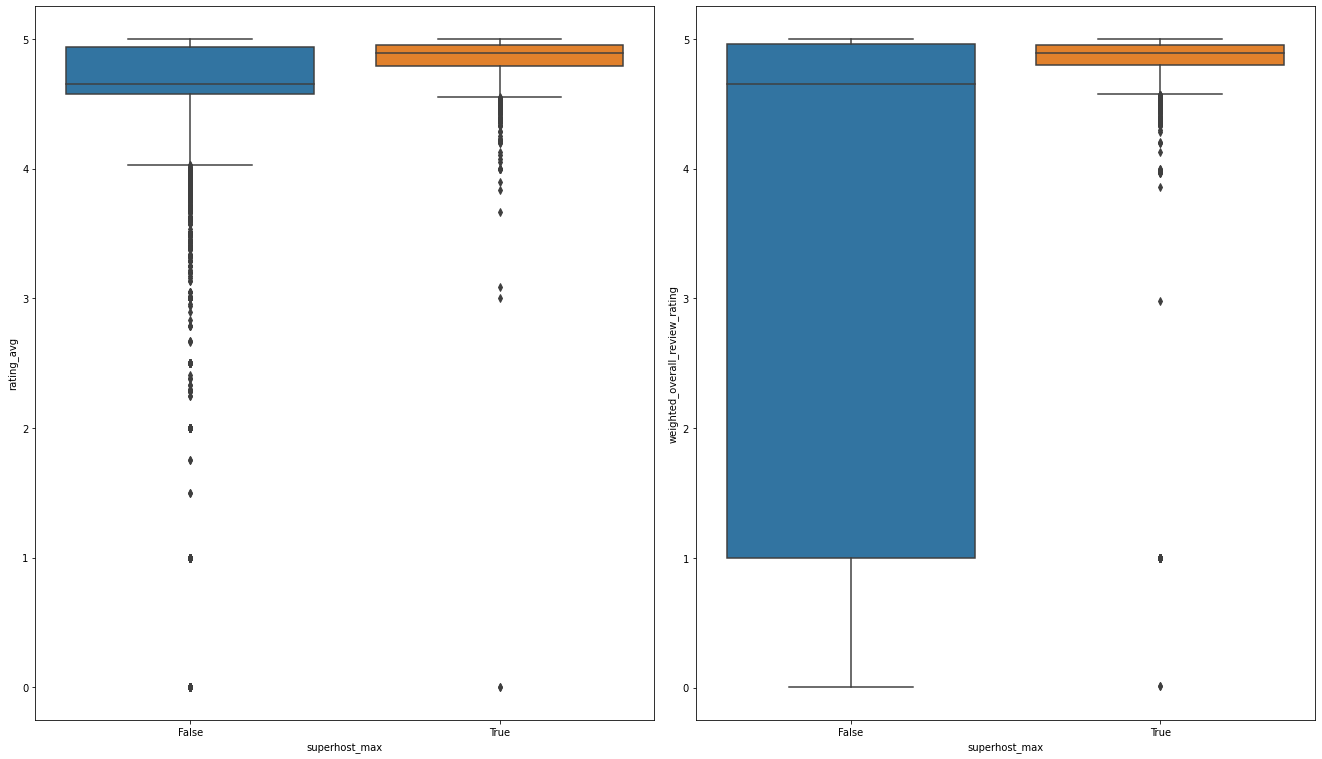

In [348]:
plt.close('all')
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(18.5, 10.5)
fig.tight_layout()

ax = sns.boxplot(x="superhost_max", y="rating_avg", data=host_df.dropna(), ax=axes[0])
#ax.set_ylim(4,5.1)
ax = sns.boxplot(x="superhost_max", y="weighted_overall_review_rating", data=host_df.dropna(), ax=axes[1])
#ax.set_ylim(4,5.1)

Setup host level dataframe for logistic regression

In [349]:
Categoricals_to_convert = ['response_time_max']

# using pd get dummies for the category columns we are keeping
dummies = pd.get_dummies(host_df[Categoricals_to_convert],drop_first=True)

#dropping original columns
temp = host_df.drop(Categoricals_to_convert,axis=1)

#concating dummies to the data frame
host_df = pd.concat([temp,dummies],axis=1)

host_df.head()


#

,host_id,rating_avg,rating_max,reviews_total,response_rate_median,acceptance_rate_median,total_nyc_listings,accommodates_median,price_median,availability_60_median,reviews_duration_median,superhost_max,weighted_overall_review_rating,response_time_max_missing,response_time_max_within a day,response_time_max_within a few hours,response_time_max_within an hour
0,2420,4.574993,4.574993,0,100.000000,89.000000,1.0,5.0,802.0,21.0,0.0,True,1.0,0,0,0,1
1,2438,0.000000,0.000000,1,86.330958,75.619603,1.0,4.0,95.0,0.0,0.0,False,0.009901,1,0,0,0
2,2571,4.910000,4.910000,34,100.000000,29.000000,1.0,4.0,139.0,6.0,1579.0,True,4.90885,0,0,0,1
3,2782,4.574993,4.574993,0,80.000000,44.000000,1.0,4.0,95.0,0.0,0.0,False,1.0,0,1,0,0
4,2787,4.732499,4.880000,136,100.000000,94.000000,8.0,2.0,149.0,60.0,532.5,False,4.77009,0,0,0,1


<AxesSubplot:>

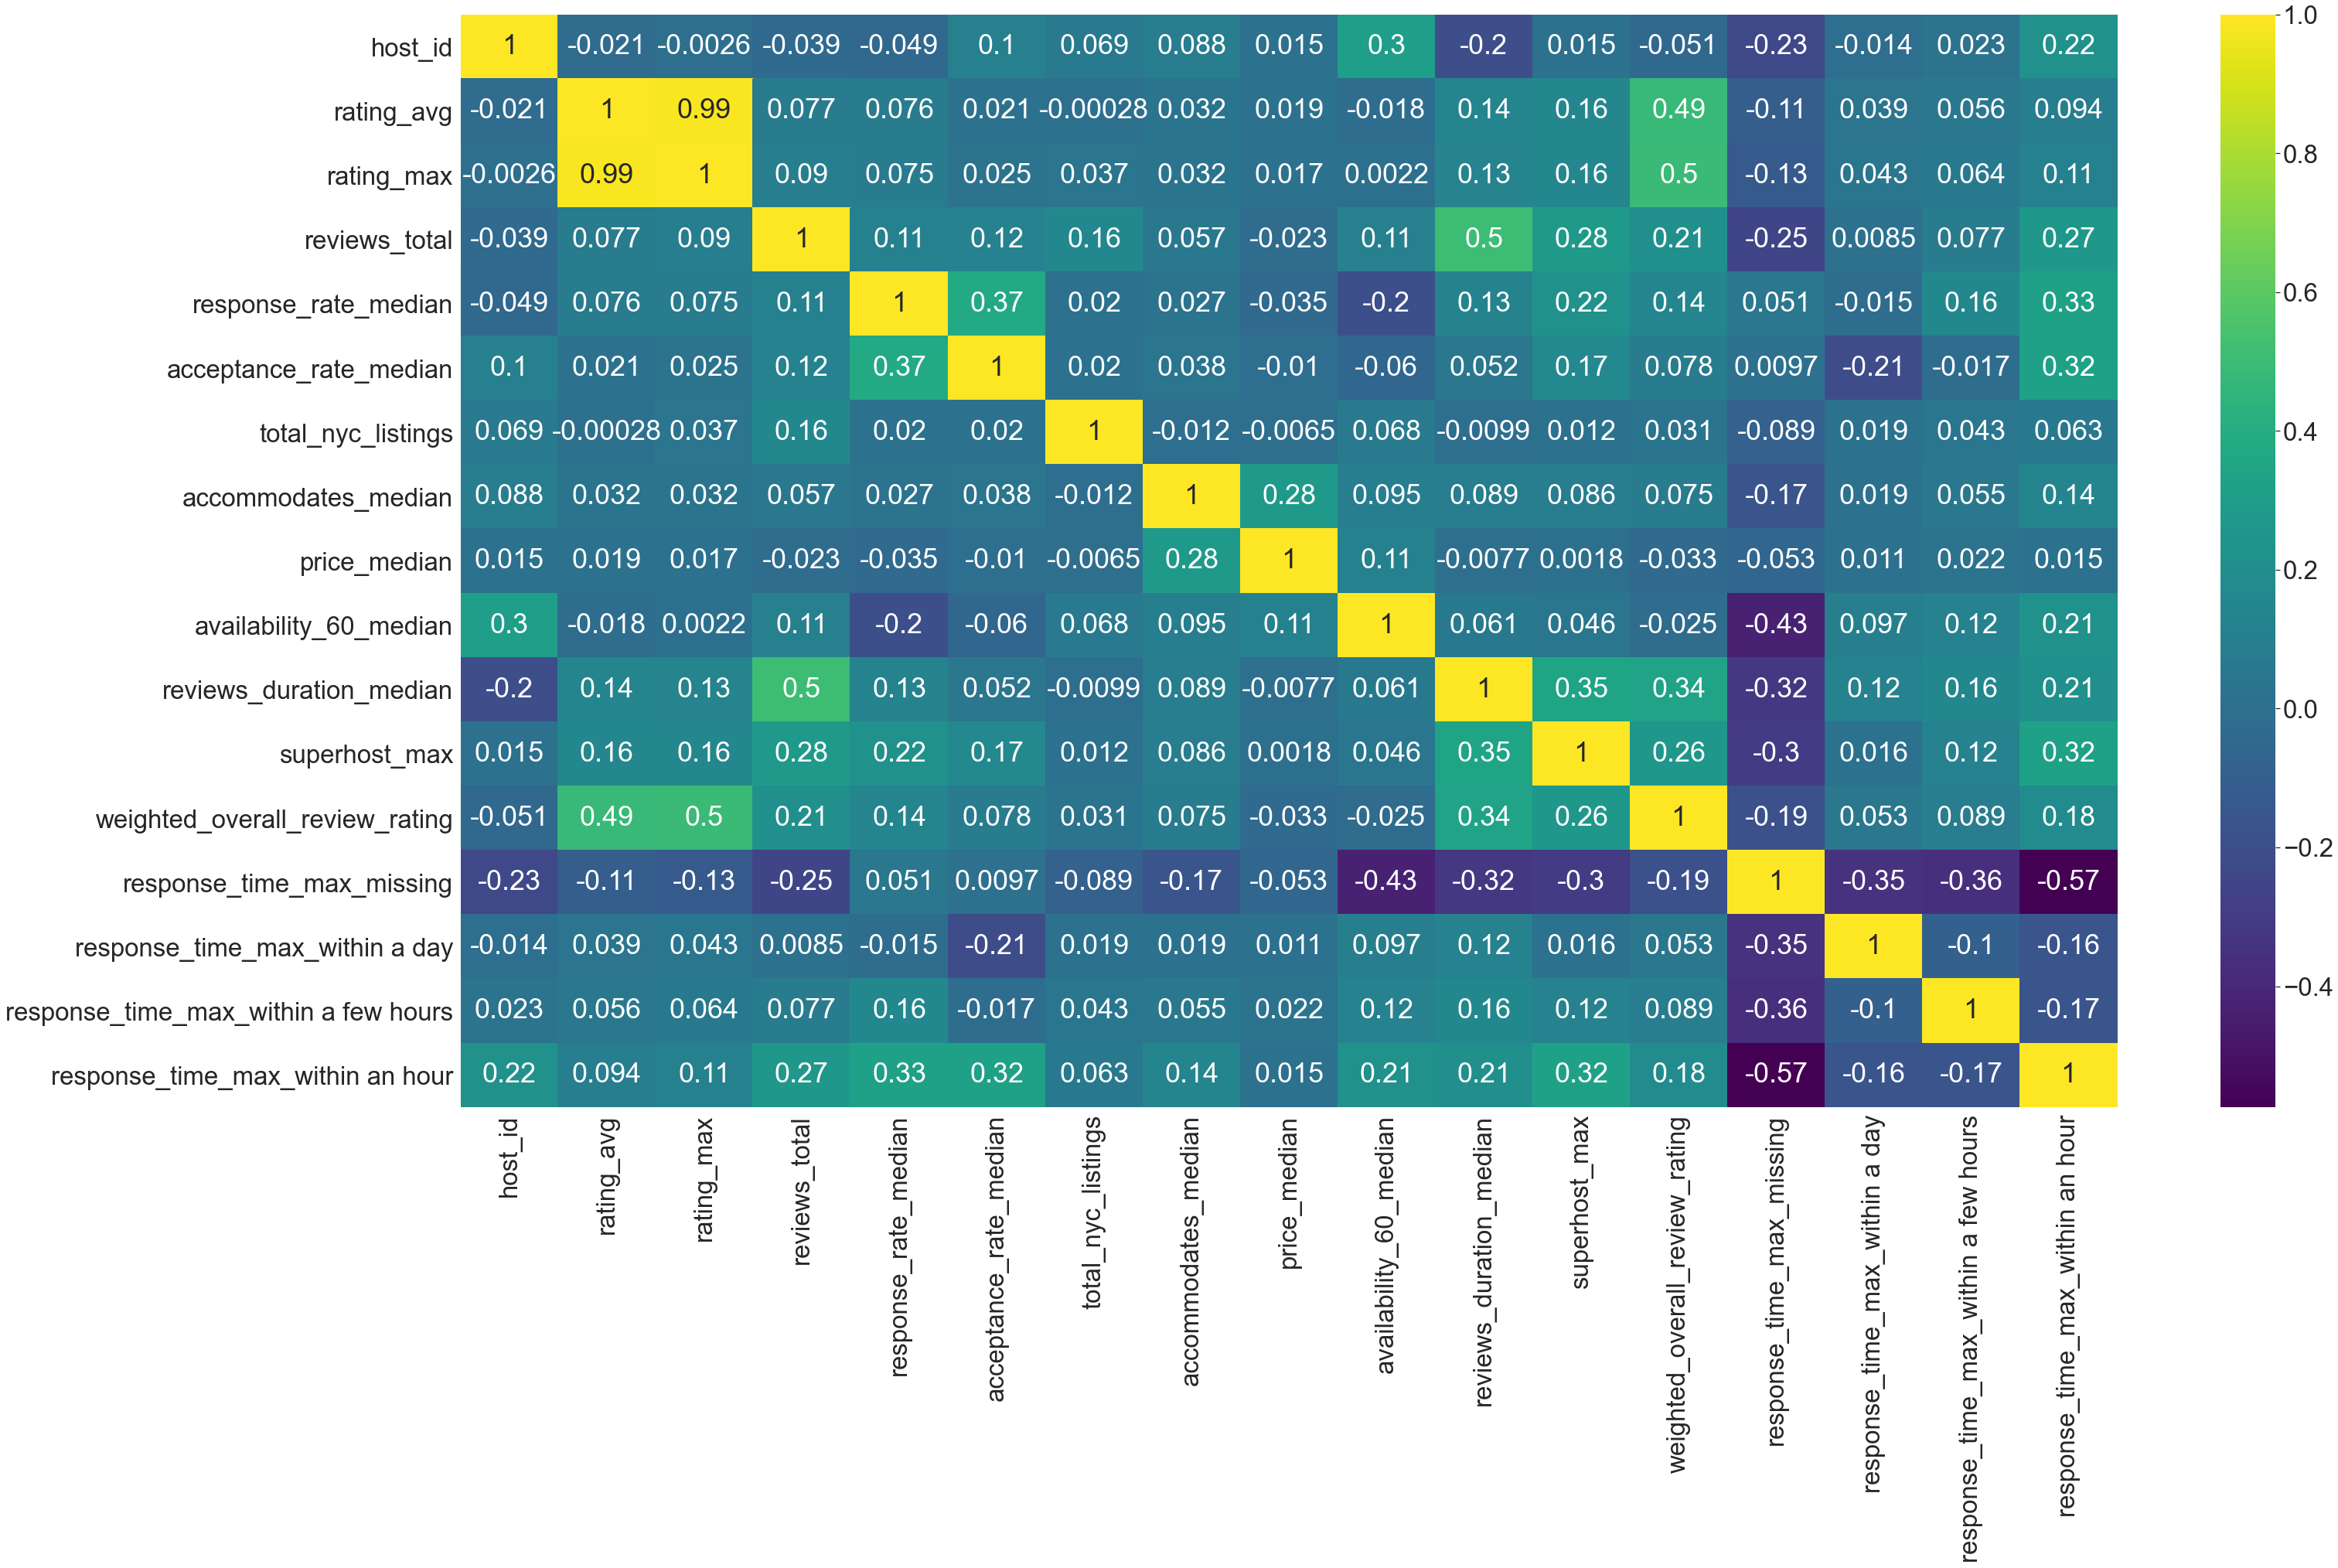

In [359]:
plt.figure(figsize=(48,26))
sns.set(font_scale=3)
sns.heatmap(host_df.corr(),annot=True,cmap='viridis')

AttributeError: 'numpy.ndarray' object has no attribute 'isna'

In [355]:

#Create new X predictor matrix
X_host = host_df.drop(['superhost_max','rating_max'],axis=1).values
y_host = host_df['superhost_max'].values
y_host = y_host.astype(int)

#Scale new predictor matrix
scl_obj.fit(X_host)
X_host = scl_obj.transform(X_host)

accuracies_host = cross_val_score(lr, X_host, y=y_host, cv=cv_object) # this also can help with parallelism
print(accuracies_host)
print("Mean Accuracy = ",np.mean(accuracies_host))

[0.8682377  0.85901639 0.86270492]
Mean Accuracy =  0.8633196721311475


In [379]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

scorer = {
    'accuracy': make_scorer(accuracy_score),
    'sensitivity': make_scorer(recall_score),
    'specificity': make_scorer(recall_score,pos_label=0)
}

cv_results = sklearn.model_selection.cross_validate(lr, X_host, y_host, cv=cv_object, scoring=scorer)
print(cv_results)
print("Mean Accuracy = ",cv_results['test_accuracy'].mean())
print("Mean Sensitivity = ",cv_results['test_sensitivity'].mean())
print("Mean Specificity = ",cv_results['test_specificity'].mean())


{'fit_time': array([0.05149698, 0.03315306, 0.03545904]), 'score_time': array([0.00283694, 0.00241208, 0.00250602]), 'test_accuracy': array([0.8682377 , 0.85901639, 0.86270492]), 'test_sensitivity': array([0.41978287, 0.38602941, 0.41706161]), 'test_specificity': array([0.96000987, 0.95398622, 0.95589693])}
Mean Accuracy =  0.8633196721311475
Mean Sensitivity =  0.4076246313559812
Mean Specificity =  0.95663100740958


In [356]:
lr.fit(X_host,y_host)

weights = lr.coef_.T # take transpose to make a column vector
variable_names = host_df.drop(['superhost_max','rating_max'],axis=1).columns #Fixed to relect names that are in X but need to update manually if changed above
#for coef, name in zip(weights,variable_names):
#    print(name, 'has weight of', coef[0])

coefficients = pd.DataFrame(weights,variable_names)
coefficients = coefficients.rename(columns={coefficients.columns[0]: 'weight'})
coefficients = coefficients.sort_values(by='weight', key=abs, ascending=False)
coefficients.head(100)

,weight
rating_avg,2.640542
response_rate_median,0.874174
response_time_max_missing,-0.848790
weighted_overall_review_rating,0.590850
reviews_duration_median,0.469585
response_time_max_within a day,-0.297259
response_time_max_within an hour,-0.251891
response_time_max_within a few hours,-0.240803
reviews_total,0.206433
acceptance_rate_median,0.190837


In [274]:
predictors = ['rating_avg','response_rate_median','response_time_max_within an hour','reviews_duration_median']

#Create new X predictor matrix
X2 = host_df[predictors].values

#Scale new predictor matrix
scl_obj.fit(X2)
X2 = scl_obj.transform(X2)

accuracies2 = cross_val_score(lr, X2, y=y_host, cv=cv_object) # this also can help with parallelism
print(accuracies2)
print("Mean Accuracy = ",np.mean(accuracies2))

#Note mean accuracy went down slightly when variables reduced to top 4 features

[0.8647541  0.85409836 0.8557377 ]
Mean Accuracy =  0.8581967213114754


In [278]:
parameters = {
                'penalty': ['l1', 'l2', 'elasticnet', 'none'], 
                'C': [1, 10, 20],
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                'class_weight': [None, 'balanced'],
             }


clf = LogisticRegression()

grid_obj = GridSearchCV(clf, parameters, cv=cv_object, scoring='accuracy')
grid_obj = grid_obj.fit(X_host, y_host)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selectio

In [279]:
print(grid_obj.best_estimator_.get_params())

print('Model accuracy is',grid_obj.score(X_host, y_host))

{'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Model accuracy is 0.8608435463376645


(4.0, 5.1)

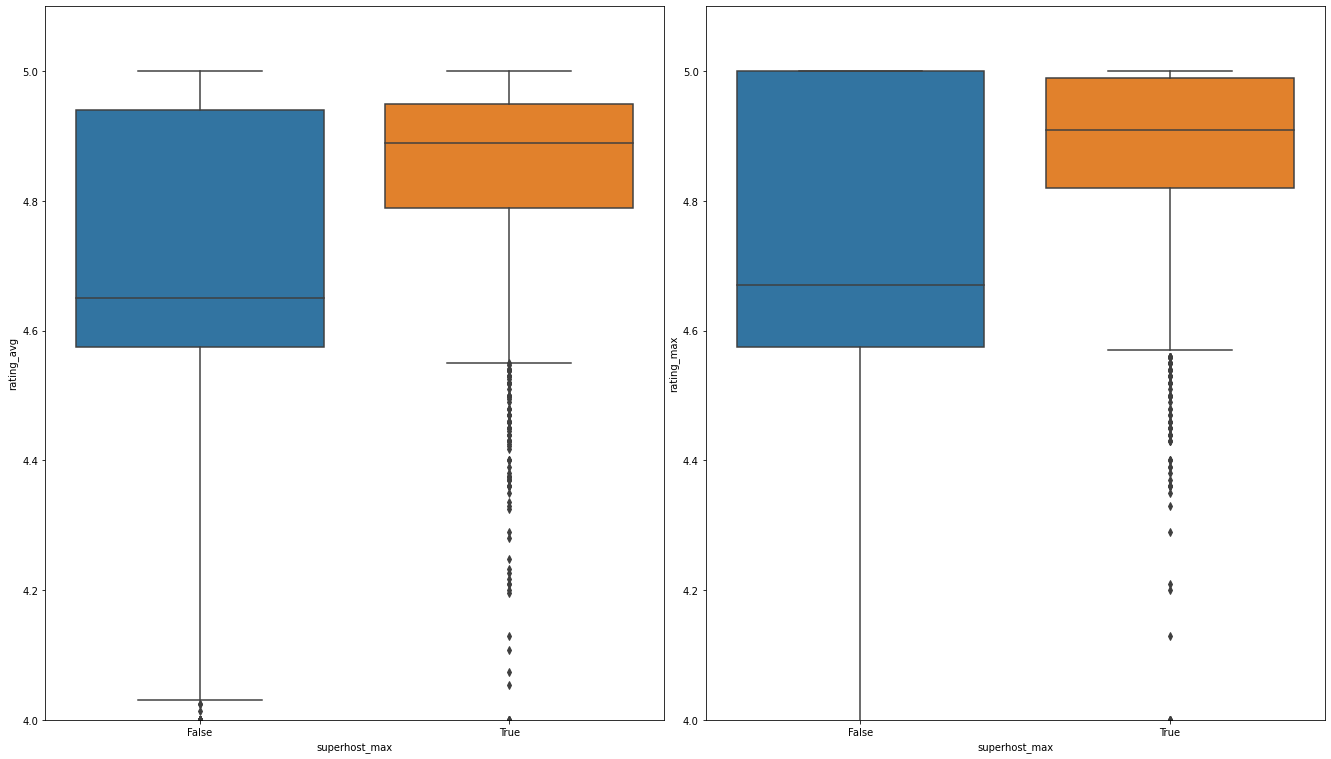

In [269]:
plt.close('all')
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(18.5, 10.5)
fig.tight_layout()

ax = sns.boxplot(x="superhost_max", y="rating_avg", data=host_df, ax=axes[0])
ax.set_ylim(4,5.1)
ax = sns.boxplot(x="superhost_max", y="rating_max", data=host_df, ax=axes[1])
ax.set_ylim(4,5.1)

The plot above is showing the inherent data problem inpreventing us getting a higher accuracy

We know that rating of at least 4.8 is required by aibnb superhost criteria

Superhost status is only updated by airbnb once per quarter, the ratings data is current. It's possible these hosts were classified as superhost a quarter ago and retain status but their ratings have dropped since then and they don't currently meet criteria. In order to improve model performance we would need ratings and other data for the exact same time frame that airbnb used to grant superhost status.

No amount of tuning hyperparameters or feature selection will help us overcome this challenge